<a href="https://colab.research.google.com/github/MN589/Data-Science-and-ML-Project-Portfolio/blob/main/Using%20Time-Series%20Analysis%20for%20Sales%20and%20Demand%20Forecasting/Using_time_series_analysis_for_sales_and_demand_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Using time series analysis for sales and demand forecasting


## **Business context**

The Nielsen BookScan service is the world’s largest continuous book sales tracking service in the world, operating in the UK, Ireland, Australia, New Zealand, India, South Africa, Italy, Spain, Mexico, Brazil, Poland, and Colombia. Nielsen BookScan collects transactional data at the point of sale, directly from tills and dispatch systems of all major book retailers. This ensures detailed and highly accurate sales information on which books are selling and at what price, giving clients the most up-to-date and relevant data. The Nielsen BookScan Total Consumer Market (TCM) data covers approximately 90% of all retail print book purchases in the UK. The remaining sites are specialised, such as gift shops, specialist booksellers, and tourist information centres.


Nielsen BookScan can be used to:
Monitor titles and authors against the competition and overall market.
Analyse pricing and discounting by format or category.
Gauge the success of marketing campaigns and promotions.
See which categories are growing and declining.
Learn what works in your market and how that might differ from other countries.

Nielsen BookScan sales data can be analysed by various criteria, including category, publisher, and format,
allowing users to see which genres are selling in which format. Users can track market trends to see which titles are driving the results, and patterns can easily be interpreted. In addition, the actual selling price is included. This inclusion makes it easier to identify trends for the level of discounting (e.g. by title, author, genre, format, region, and publisher) when analysing book sales.

**Project context**

Nielsen is seeking to invest in developing a new service aimed at small to medium-sized independent publishers. This service is aimed at supporting publishers in using historical sales data to make data-driven decisions about their future investment in new publications. Their publisher customers are interested in being able to make more accurate predictions of the overall sales profile post-publication for better stock control and initial investment, but they are also interested in understanding the useful economic life span that a title may have.

Nielsen is targeting small to medium-sized independent publishers as their research has shown that there is a strong demand for this insight, but businesses cannot invest in this infrastructure and would pay a premium to have access to quality-assured data and analysis in this area. Producing a new publication requires a significant upfront investment, and they would like to be able to more accurately identify books with strong long-term potential. More specifically, they are looking for titles with sales patterns that exhibit well-established seasonal patterns and positive trends that show potential great returns and to learn more about these types of publications. Nielsen will then apply this understanding to their commission and print volume strategy to be more successful in acquiring titles that have longevity. Additionally, this will enable them to deliver better returns by ensuring the correct stock levels in relation to demand and avoiding over- or understocking, which can be costly.

You will notice that some titles experience fluctuations in sales due to various factors, such as increased media attention or cultural relevance (e.g. the recent resurgence of interest in George Orwell’s 1984). However, certain books endure over time and are often studied in academic settings for their deeper significance.

For this project, Nielsen has provided you with two data sets. The objective is to identify sales patterns that demonstrate seasonal trends or any other traits, providing insights to inform reordering, restocking, and reprinting decisions for various books (by their International Standard Book Number, or ISBN).


<br>

## **Objective**

You will conduct a comprehensive analysis on select books from Nielsen's data, identifying key sales patterns that exhibit clear seasonal trends or other distinctive characteristics. These insights will serve as a data-driven foundation for optimising procurement, re-ordering, and stocking decisions, ensuring efficient inventory management.


In this Notebook, you will:
- Import both datasets, resample weekly sales data to ensure missing weeks are filled with zeros, and convert ISBNs to strings and dates to datetime objects.
- Filter out ISBNs with sales data beyond 2024-07-01, display these ISBNs, and plot their sales patterns for further analysis.
- Investigate the general sales patterns across different time periods (1-12 years vs. 12-24 years) and analyse possible reasons for any noticeable changes.
- Focus on two specific books, The Alchemist and The Very Hungry Caterpillar, for deeper analysis. Filter their data from 2012 onwards for further forecasting.
- Perform time series decomposition, ACF/PACF analysis, and stationarity checks for both books. Use Auto ARIMA to identify the best model and forecast the final 32 weeks of data.
- Prepare the data for machine learning models, create an XGBoost pipeline, tune parameters using grid search, and forecast the final 32 weeks for both books.
- Build and tune an LSTM model using KerasTuner, forecast the final 32 weeks of data, and evaluate the performance using MAE and MAPE.
- Apply both sequential and parallel hybrid models combining SARIMA and LSTM, tune the models, and evaluate their performance using various metrics.
- Aggregate weekly data to monthly data, train XGBoost and SARIMA models to forecast eight months, and compare results with weekly predictions.




You will also write a report summarising the results of your findings and recommendations.
t you read the data from all four tabs.

**Conducting initial data investigation:**

1. Note that the data provided is weekly data. If no sales happened in a particular week, there will be no data representation for that week. This means that the data is not at fixed intervals.
As a result, resample the data and fill in missing values with 0, such that even weeks with 0 sales is represented.
2. Convert the ISBNs to a string value.
3. Convert date to datetime object. (Recall that setting the date as the index has several advantages for time series handling.)
4. Filter out the ISBNs (from all four tabs) wherein sales data exists beyond 2024-07-01. Show all the ISBNs that satisfy this criterion. Capture this in your report.
5. Plot the data of all the ISBNs from the previous step by placing them in a loop.
6. Investigate these plots to understand the general sales patterns, and comment on the general patterns visible in the data. Do the patterns drastically change for the period 1–12 years vs the period 12–24 years? Explain why or why not with possible reasons.
7. Select two books from the list (*The Alchemist* and *The Very Hungry Caterpillar*) for further analysis. Focus on the period >2012-01-01. Filter the sales data for both these books to retain the date range >2012-01-01, until the final datapoint.

**Classical techniques:**
1. Perform decomposition on the data for both books. Determine what type of decomposition is suitable for each book, and comment on the components' characteristics.
2. Perform ACF and PACF on both books. Comment on the results and what they indicate.
3. Check for stationarity of the data for both books. Comment on the results and what they indicate.
4. Perform Auto ARIMA on both books. **The forecast horizon is the final 32 weeks of data.** All prior data (from 2012-01-01 onwards) can be used as the training data. Set reasonable bounds for Auto ARIMA's various parameters so that Auto ARIMA can identify the most suitable model.
5. Comment on the best model provided by Auto ARIMA for both books.
6. Find the residuals of the 'best' model for both books. Comment on the residuals.
7. Use the best model to predict the final 32 weeks of data. Plot the prediction along with the confidence intervals for both books.
8. Comment on how the prediction compares with the actual values.

**Machine learning and deep learning techniques**
1. Prepare the data to feed into the machine learning models. The forecast horizon is **32 weeks**. The training data consists of all prior data, up to 2012-01-01.
2. Create the required pipeline for the XGBoost model.
3. Perform cross-validation.
4. Perform parameter tuning (including window_length) using grid search.
5. Identify the best models.
6. Use the best models to forecast the **final 32 weeks** of sales data for both books.
7. Plot the original data along with the predictions.
8. Display the MAE and MAPE.
9. Create an LSTM model for both books.
10. Apply KerasTuner, and perform hyperparameter tuning using the training data, for both books.
11. Use the best model to predict the **final 32 weeks** of data for both books.
12. Plot the original data along with the predictions.
13. Display the MAE and MAPE.

**Hybrid model**
1. Apply a hybrid model of SARIMA and LSTM in sequential combination wherein the residuals from SARIMA will be forecasted using LSTM. The final prediction will be the sum of the predictions from SARIMA and LSTM. The LSTM will be trained on the residuals obtained during the training of the SARIMA model. **The forecast horizon will be the final 32 weeks**. Use KerasTuner to get the best model. Plot the results. Display the MAE and MAPE, and comment on the results.
2. Apply a hybrid model of SARIMA and LSTM in parallel combination wherein the predictions from SARIMA and the predictions from LSTM will be combined in the form of a weighted average. The final prediction will be the weighted sum of the predictions from SARIMA and LSTM. Both the SARIMA and the LSTM will be trained separately on the complete training set. **The forecast horizon will be the final 32 weeks**. Use KerasTuner to get the best model. Plot the results. Display the MAE and MAPE, and comment on the results.
3. Modify the weightage in the parallel combination model to get different results. Find the weightage giving the best results, and comment on those results.

**Monthly prediction**
1. Instead of a weekly prediction, perform a monthly prediction. Aggregate the weekly sales data to monthly sales data for both books.
2. Train the XGBoost model on this data. Forecast using the trained model. The forecast horizon is 8 months. Plot the results, and calculate the MAE and MAPE.
3. Train the SARIMA model (using Auto ARIMA) on this data. Forecast using the trained model. The forecast horizon is 8 months. Plot the results, and calculate the MAE and MAPE.
4. Compare and contrast the monthly predictions of both books against the weekly predictions. Comment on which one is more accurate or if they are the same.

## Import Libraries and Packages

In [ ]:
!pip install --upgrade --force-reinstall \
    numpy==1.26.4 \
    pandas==2.1.3 \
    matplotlib==3.8.4 \
    seaborn==0.13.2 \
    statsmodels==0.14.1 \
    pmdarima==2.0.3 \
    scikit-learn==1.3.2 \
    tensorflow==2.15.0 \
    openpyxl==3.1.2 \
    xlrd==2.0.1 \
    sktime==0.25.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import pmdarima as pm
import tensorflow as tf
import sktime
from sktime.forecasting.arima import AutoARIMA

print(" All libraries imported successfully!")


 All libraries imported successfully!


In [ ]:
from datetime import datetime, timedelta
from matplotlib.patches import Rectangle
import matplotlib.animation as animation
from matplotlib import animation
from matplotlib import rc
import statsmodels.graphics.api as smgraphics # gives access to all plotting functions in statsmodels.
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller as adf
from statsmodels.tsa.seasonal import STL
from scipy.stats import boxcox
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
import gdown
from pmdarima.arima import auto_arima
import warnings
# Suppress all warnings.
warnings.filterwarnings("ignore")

print(" All libraries imported successfully!")

 All libraries imported successfully!


In [ ]:
from statsmodels.tsa.stattools import acf

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 40.5 MB/s eta 0:00:00


In [ ]:
import lightgbm as lgb
from sktime.forecasting.compose import (TransformedTargetForecaster, make_reduction)
from sktime.forecasting.model_selection import (ExpandingWindowSplitter, ForecastingGridSearchCV)
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

plt.rcParams["figure.figsize"] = (10, 5)

In [ ]:
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.transformations.series.detrend import Deseasonalizer, Detrender

In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.4/322.4 MB 11.6 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBRegressor

In [ ]:
!pip install hyperopt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.3/491.3 kB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.0/203.0 kB 24.0 MB/s eta 0:00:00


In [ ]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Dense, LSTM, Dropout

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


In [ ]:
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon

In [ ]:
import joblib

## Review Datasets:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Weekly_data_sales = pd.ExcelFile('drive/MyDrive/Time_series_project/UK Weekly Trended Timeline from 200101_202429 (1).xlsx')
ISBN_list = pd.ExcelFile('drive/MyDrive/Time_series_project/ISBN List (2).xlsx')

In [ ]:
print(Weekly_data_sales.sheet_names)
print(ISBN_list.sheet_names)

['F Adult Fiction', 'S Adult Non-Fiction Specialist', 'T Adult Non-Fiction Trade', 'Y Childrens YA & Educational']
['F - Adult Fiction', 'S Adult Non-Fiction Specialist', 'T Adult Non-Fiction Trade', 'Y Childrens YA & Educational']


In [ ]:
#Create DataFrame for each Tab in Weekly Sales Data
Y_Children_YA_Educational = Weekly_data_sales.parse('Y Childrens YA & Educational')
t_adult_non_fiction_trade = Weekly_data_sales.parse('T Adult Non-Fiction Trade')
S_adult_non_fiction_specialist = Weekly_data_sales.parse('S Adult Non-Fiction Specialist')
F_Adult_Fiction = Weekly_data_sales.parse('F Adult Fiction')

In [ ]:
# Concatenate the different Categories of Books in the Weekly Sales Data
weekly_book_sales_df = pd.concat([Y_Children_YA_Educational, t_adult_non_fiction_trade, S_adult_non_fiction_specialist, F_Adult_Fiction])

#Display Combined DataFrame
weekly_book_sales_df.head(10)

ISBN                Title      Author  Interval   End Date  \
0  9780001713031  Cat in the Hat, The  Seuss, Dr.    201433 2014-08-16   
1  9780001713031  Cat in the Hat, The  Seuss, Dr.    200742 2007-10-20   
2  9780001713031  Cat in the Hat, The  Seuss, Dr.    200741 2007-10-13   
3  9780001713031  Cat in the Hat, The  Seuss, Dr.    200738 2007-09-22   
4  9780001713031  Cat in the Hat, The  Seuss, Dr.    200737 2007-09-15   
5  9780001713031  Cat in the Hat, The  Seuss, Dr.    200735 2007-09-01   
6  9780001713031  Cat in the Hat, The  Seuss, Dr.    200734 2007-08-25   
7  9780001713031  Cat in the Hat, The  Seuss, Dr.    200733 2007-08-18   
8  9780001713031  Cat in the Hat, The  Seuss, Dr.    200730 2007-07-28   
9  9780001713031  Cat in the Hat, The  Seuss, Dr.    200729 2007-07-21   

   Volume  Value     ASP   RRP    Binding  Imprint    Publisher Group  \
0       5  24.95  4.9900  4.99  Paperback  Collins  HarperCollins Grp   
1       1   3.99  3.9900  4.99  Paperback  Collins  HarperCollins Grp   
2       3  14.97  4.9900  4.99  Paperback  Collins  HarperCollins Grp   
3       4  18.96  4.7400  4.99  Paperback  Collins  HarperCollins Grp   
4       2   7.98  3.9900  4.99  Paperback  Collins  HarperCollins Grp   
5       6  25.94  4.3233  4.99  Paperback  Collins  HarperCollins Grp   
6       1   4.99  4.9900  4.99  Paperback  Collins  HarperCollins Grp   
7       1   4.99  4.9900  4.99  Paperback  Collins  HarperCollins Grp   
8       1   4.99  4.9900  4.99  Paperback  Collins  HarperCollins Grp   
9       2   9.98  4.9900  4.99  Paperback  Collins  HarperCollins Grp   

                    Product Class  
0  Y4.2 Reference & Home Learning  
1  Y4.2 Reference & Home Learning  
2  Y4.2 Reference & Home Learning  
3  Y4.2 Reference & Home Learning  
4  Y4.2 Reference & Home Learning  
5  Y4.2 Reference & Home Learning  
6  Y4.2 Reference & Home Learning  
7  Y4.2 Reference & Home Learning  
8  Y4.2 Reference & Home Learning  
9  Y4.2 Reference & Home Learning

In [ ]:
# Create new column Revenue
weekly_book_sales_df['Revenue'] = weekly_book_sales_df['Volume'] * weekly_book_sales_df['Value']

#Display
weekly_book_sales_df.head()

ISBN                Title      Author  Interval   End Date  \
0  9780001713031  Cat in the Hat, The  Seuss, Dr.    201433 2014-08-16   
1  9780001713031  Cat in the Hat, The  Seuss, Dr.    200742 2007-10-20   
2  9780001713031  Cat in the Hat, The  Seuss, Dr.    200741 2007-10-13   
3  9780001713031  Cat in the Hat, The  Seuss, Dr.    200738 2007-09-22   
4  9780001713031  Cat in the Hat, The  Seuss, Dr.    200737 2007-09-15   

   Volume  Value   ASP   RRP    Binding  Imprint    Publisher Group  \
0       5  24.95  4.99  4.99  Paperback  Collins  HarperCollins Grp   
1       1   3.99  3.99  4.99  Paperback  Collins  HarperCollins Grp   
2       3  14.97  4.99  4.99  Paperback  Collins  HarperCollins Grp   
3       4  18.96  4.74  4.99  Paperback  Collins  HarperCollins Grp   
4       2   7.98  3.99  4.99  Paperback  Collins  HarperCollins Grp   

                    Product Class  Revenue  
0  Y4.2 Reference & Home Learning   124.75  
1  Y4.2 Reference & Home Learning     3.99  
2  Y4.2 Reference & Home Learning    44.91  
3  Y4.2 Reference & Home Learning    75.84  
4  Y4.2 Reference & Home Learning    15.96

In [ ]:
#Remove Negative values from the Value, RRP, Revenue and Volume Columns
cols_to_fix = ['Value', 'RRP', 'Revenue', 'Volume','ASP']

#Change Negative Values to NAN
weekly_book_sales_df[cols_to_fix] = weekly_book_sales_df[cols_to_fix].applymap(lambda x: np.nan if x < 0 else x)

In [ ]:
# Create DataFrame for each Tab in the ISBN List Data set that contains additional meta data
Y_Children_YA_Educational_ISBN_meta = ISBN_list.parse('Y Childrens YA & Educational')
t_adult_non_fiction_trade_ISBN_meta = ISBN_list.parse('T Adult Non-Fiction Trade')
S_adult_non_fiction_specialist_ISBN_meta = ISBN_list.parse('S Adult Non-Fiction Specialist')
F_Adult_Fiction_ISBN_meta = ISBN_list.parse('F - Adult Fiction')

In [ ]:
# Concatenate DataFrames from the ISBN List Excel File
isbn_list_df = pd.concat([Y_Children_YA_Educational_ISBN_meta, t_adult_non_fiction_trade_ISBN_meta, S_adult_non_fiction_specialist_ISBN_meta, F_Adult_Fiction_ISBN_meta])

# Display Combined Data Frame from the ISBN List File
isbn_list_df.head()

ISBN                                              Title  \
0  9780747550990                Harry Potter and the Goblet of Fire   
1  9780747538486            Harry Potter and the Chamber of Secrets   
2  9780747532743           Harry Potter and the Philosopher's Stone   
3  9780747546290           Harry Potter and the Prisoner of Azkaban   
4  9780747554660  Comic Relief: Fantastic Beasts and Where to Fi...   

                             Author                    Imprint  \
0                    Rowling, J. K.  Bloomsbury Publishing PLC   
1                    Rowling, J. K.  Bloomsbury Publishing PLC   
2                    Rowling, J. K.  Bloomsbury Publishing PLC   
3                    Rowling, J. K.  Bloomsbury Publishing PLC   
4  Scamander, Newt & Rowling, J. K.             Obscurus Books   

  Publisher Group   RRP    Binding Publication Date             Product Class  \
0  Bloomsbury Grp  8.99  Paperback       2001-07-06   Y2.1 Children's Fiction   
1  Bloomsbury Grp  6.99  Paperback       1999-05-28   Y2.1 Children's Fiction   
2  Bloomsbury Grp  6.99  Paperback       1997-06-26   Y2.1 Children's Fiction   
3  Bloomsbury Grp  6.99  Paperback       2000-04-01   Y2.1 Children's Fiction   
4  Bloomsbury Grp  2.50  Paperback       2001-03-12  Y2.2 Young Adult Fiction   

  Country of Publication  
0         United Kingdom  
1         United Kingdom  
2         United Kingdom  
3         United Kingdom  
4         United Kingdom

In [ ]:
# Drop duplicate Columns in the ISBN list before merging
ISBN_meta_data_df = isbn_list_df.drop(['Title','Author','Imprint','Publisher Group','Product Class', 'Binding','RRP', 'Publication Date'], axis=1)

#Display
ISBN_meta_data_df.head()

ISBN Country of Publication
0  9780747550990         United Kingdom
1  9780747538486         United Kingdom
2  9780747532743         United Kingdom
3  9780747546290         United Kingdom
4  9780747554660         United Kingdom

In [ ]:
# Merge the Weekly Sales Dataframe with the ISBN meta Dataframe
weekly_book_sales_df = pd.merge(weekly_book_sales_df, ISBN_meta_data_df, on='ISBN')

# Display
weekly_book_sales_df.head()

ISBN                Title      Author  Interval   End Date  \
0  9780001713031  Cat in the Hat, The  Seuss, Dr.    201433 2014-08-16   
1  9780001713031  Cat in the Hat, The  Seuss, Dr.    200742 2007-10-20   
2  9780001713031  Cat in the Hat, The  Seuss, Dr.    200741 2007-10-13   
3  9780001713031  Cat in the Hat, The  Seuss, Dr.    200738 2007-09-22   
4  9780001713031  Cat in the Hat, The  Seuss, Dr.    200737 2007-09-15   

   Volume  Value   ASP   RRP    Binding  Imprint    Publisher Group  \
0     5.0  24.95  4.99  4.99  Paperback  Collins  HarperCollins Grp   
1     1.0   3.99  3.99  4.99  Paperback  Collins  HarperCollins Grp   
2     3.0  14.97  4.99  4.99  Paperback  Collins  HarperCollins Grp   
3     4.0  18.96  4.74  4.99  Paperback  Collins  HarperCollins Grp   
4     2.0   7.98  3.99  4.99  Paperback  Collins  HarperCollins Grp   

                    Product Class  Revenue Country of Publication  
0  Y4.2 Reference & Home Learning   124.75         United Kingdom  
1  Y4.2 Reference & Home Learning     3.99         United Kingdom  
2  Y4.2 Reference & Home Learning    44.91         United Kingdom  
3  Y4.2 Reference & Home Learning    75.84         United Kingdom  
4  Y4.2 Reference & Home Learning    15.96         United Kingdom

### Data Cleaning and Review

In [ ]:
weekly_book_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227224 entries, 0 to 227223
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ISBN                    227224 non-null  int64         
 1   Title                   227224 non-null  object        
 2   Author                  212345 non-null  object        
 3   Interval                227224 non-null  int64         
 4   End Date                227224 non-null  datetime64[ns]
 5   Volume                  226717 non-null  float64       
 6   Value                   226629 non-null  float64       
 7   ASP                     226866 non-null  float64       
 8   RRP                     221262 non-null  float64       
 9   Binding                 227224 non-null  object        
 10  Imprint                 227224 non-null  object        
 11  Publisher Group         227224 non-null  object        
 12  Product Class           227224

In [ ]:
# Convert End date to Datetime
weekly_book_sales_df['End Date'] = pd.to_datetime(weekly_book_sales_df['End Date'], dayfirst=True)

# Convert ISBN to string
weekly_book_sales_df['ISBN'] = weekly_book_sales_df['ISBN'].astype(str)


# set end date to index
weekly_book_sales_df.set_index('End Date', inplace=True)


In [ ]:
weekly_book_sales_df.head(50)

ISBN                Title      Author  Interval  Volume  \
End Date                                                                       
2014-08-16  9780001713031  Cat in the Hat, The  Seuss, Dr.    201433     5.0   
2007-10-20  9780001713031  Cat in the Hat, The  Seuss, Dr.    200742     1.0   
2007-10-13  9780001713031  Cat in the Hat, The  Seuss, Dr.    200741     3.0   
2007-09-22  9780001713031  Cat in the Hat, The  Seuss, Dr.    200738     4.0   
2007-09-15  9780001713031  Cat in the Hat, The  Seuss, Dr.    200737     2.0   
2007-09-01  9780001713031  Cat in the Hat, The  Seuss, Dr.    200735     6.0   
2007-08-25  9780001713031  Cat in the Hat, The  Seuss, Dr.    200734     1.0   
2007-08-18  9780001713031  Cat in the Hat, The  Seuss, Dr.    200733     1.0   
2007-07-28  9780001713031  Cat in the Hat, The  Seuss, Dr.    200730     1.0   
2007-07-21  9780001713031  Cat in the Hat, The  Seuss, Dr.    200729     2.0   
2007-07-14  9780001713031  Cat in the Hat, The  Seuss, Dr.    200728     2.0   
2007-07-07  9780001713031  Cat in the Hat, The  Seuss, Dr.    200727     2.0   
2007-06-30  9780001713031  Cat in the Hat, The  Seuss, Dr.    200726     6.0   
2007-06-23  9780001713031  Cat in the Hat, The  Seuss, Dr.    200725     1.0   
2007-06-16  9780001713031  Cat in the Hat, The  Seuss, Dr.    200724     4.0   
2007-06-09  9780001713031  Cat in the Hat, The  Seuss, Dr.    200723     3.0   
2007-06-02  9780001713031  Cat in the Hat, The  Seuss, Dr.    200722     3.0   
2007-05-19  9780001713031  Cat in the Hat, The  Seuss, Dr.    200720     1.0   
2007-05-05  9780001713031  Cat in the Hat, The  Seuss, Dr.    200718     2.0   
2007-04-28  9780001713031  Cat in the Hat, The  Seuss, Dr.    200717     1.0   
2007-04-14  9780001713031  Cat in the Hat, The  Seuss, Dr.    200715     2.0   
2007-04-07  9780001713031  Cat in the Hat, The  Seuss, Dr.    200714     1.0   
2007-03-31  9780001713031  Cat in the Hat, The  Seuss, Dr.    200713     2.0   
2007-03-17  9780001713031  Cat in the Hat, The  Seuss, Dr.    200711     2.0   
2007-03-10  9780001713031  Cat in the Hat, The  Seuss, Dr.    200710     1.0   
2007-03-03  9780001713031  Cat in the Hat, The  Seuss, Dr.    200709     1.0   
2007-02-17  9780001713031  Cat in the Hat, The  Seuss, Dr.    200707     2.0   
2007-02-10  9780001713031  Cat in the Hat, The  Seuss, Dr.    200706     3.0   
2007-02-03  9780001713031  Cat in the Hat, The  Seuss, Dr.    200705     1.0   
2007-01-13  9780001713031  Cat in the Hat, The  Seuss, Dr.    200702     1.0   
2006-12-23  9780001713031  Cat in the Hat, The  Seuss, Dr.    200651     6.0   
2006-12-16  9780001713031  Cat in the Hat, The  Seuss, Dr.    200650     8.0   
2006-12-09  9780001713031  Cat in the Hat, The  Seuss, Dr.    200649     4.0   
2006-12-02  9780001713031  Cat in the Hat, The  Seuss, Dr.    200648     1.0   
2006-11-18  9780001713031  Cat in the Hat, The  Seuss, Dr.    200646     1.0   
2006-11-11  9780001713031  Cat in the Hat, The  Seuss, Dr.    200645     2.0   
2006-11-04  9780001713031  Cat in the Hat, The  Seuss, Dr.    200644     2.0   
2006-10-28  9780001713031  Cat in the Hat, The  Seuss, Dr.    200643     1.0   
2006-10-21  9780001713031  Cat in the Hat, The  Seuss, Dr.    200642     1.0   
2006-10-14  9780001713031  Cat in the Hat, The  Seuss, Dr.    200641     1.0   
2006-10-07  9780001713031  Cat in the Hat, The  Seuss, Dr.    200640     2.0   
2006-09-23  9780001713031  Cat in the Hat, The  Seuss, Dr.    200638     2.0   
2006-09-16  9780001713031  Cat in the Hat, The  Seuss, Dr.    200637     3.0   
2006-09-09  9780001713031  Cat in the Hat, The  Seuss, Dr.    200636     3.0   
2006-09-02  9780001713031  Cat in the Hat, The  Seuss, Dr.    200635     1.0   
2006-08-26  9780001713031  Cat in the Hat, The  Seuss, Dr.    200634     2.0   
2006-08-19  9780001713031  Cat in the Hat, The  Seuss, Dr.    200633     2.0   
2006-08-12  9780001713031  Cat in the Hat, The  Seuss, Dr.    200632     4.0   
2006-08-05  978000171

In [ ]:
#Sort the Index
weekly_book_sales_df.sort_index(inplace=True)

# Resample to weekly and fill in missing weeks with zero
weekly_book_sales_df = weekly_book_sales_df.groupby('ISBN').resample('W').sum()

In [ ]:
weekly_book_sales_df.head()

ISBN                Title      Author  \
ISBN          End Date                                                     
9780001713031 2001-01-07  9780001713031  Cat in the Hat, The  Seuss, Dr.   
              2001-01-14  9780001713031  Cat in the Hat, The  Seuss, Dr.   
              2001-01-21  9780001713031  Cat in the Hat, The  Seuss, Dr.   
              2001-01-28  9780001713031  Cat in the Hat, The  Seuss, Dr.   
              2001-02-04  9780001713031  Cat in the Hat, The  Seuss, Dr.   

                          Interval  Volume    Value     ASP   RRP    Binding  \
ISBN          End Date                                                         
9780001713031 2001-01-07    200101   522.0  2544.07  4.8737  4.99  Paperback   
              2001-01-14    200102   379.0  1842.21  4.8607  4.99  Paperback   
              2001-01-21    200103   393.0  1921.19  4.8885  4.99  Paperback   
              2001-01-28    200104   369.0  1785.31  4.8382  4.99  Paperback   
              2001-02-04    200105   423.0  2060.07  4.8701  4.99  Paperback   

                          Imprint    Publisher Group  \
ISBN          End Date                                 
9780001713031 2001-01-07  Collins  HarperCollins Grp   
              2001-01-14  Collins  HarperCollins Grp   
              2001-01-21  Collins  HarperCollins Grp   
              2001-01-28  Collins  HarperCollins Grp   
              2001-02-04  Collins  HarperCollins Grp   

                                           Product Class     Revenue  \
ISBN          End Date                                                 
9780001713031 2001-01-07  Y4.2 Reference & Home Learning  1328004.54   
              2001-01-14  Y4.2 Reference & Home Learning   698197.59   
              2001-01-21  Y4.2 Reference & Home Learning   755027.67   
              2001-01-28  Y4.2 Reference & Home Learning   658779.39   
              2001-02-04  Y4.2 Reference & Home Learning   871409.61   

                         Country of Publication  
ISBN          End Date                           
9780001713031 2001-01-07         United Kingdom  
              2001-01-14         United Kingdom  
              2001-01-21         United Kingdom  
              2001-01-28         United Kingdom  
              2001-02-04         United Kingdom

In [ ]:
weekly_book_sales_df.describe()

Interval         Volume         Value            ASP  \
count  382871.000000  382871.000000  3.828710e+05  382871.000000   
mean   119160.860444     221.740832  1.494652e+03       4.900710   
std     98623.848740    1307.562010  9.173737e+03       5.553009   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%         0.000000       0.000000  0.000000e+00       0.000000   
50%    200231.000000       3.000000  2.581000e+01       4.763100   
75%    200735.000000      94.000000  7.122400e+02       7.501800   
max    202429.000000  193645.000000  1.056257e+06      60.000000   

                 RRP       Revenue  
count  382871.000000  3.828710e+05  
mean        6.179784  1.046569e+07  
std         7.096229  4.025045e+08  
min         0.000000  0.000000e+00  
25%         0.000000  0.000000e+00  
50%         5.990000  8.391000e+01  
75%         9.990000  6.867439e+04  
max        69.990000  9.361530e+10

The Min shows that there are negative values present, in volume, value, asp and revenue, these need to be changed to NAN.

In [ ]:
weekly_book_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 382871 entries, ('9780001713031', Timestamp('2001-01-07 00:00:00')) to ('9781903840122', Timestamp('2008-12-21 00:00:00'))
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ISBN                    382871 non-null  object 
 1   Title                   382871 non-null  object 
 2   Author                  382871 non-null  object 
 3   Interval                382871 non-null  int64  
 4   Volume                  382871 non-null  float64
 5   Value                   382871 non-null  float64
 6   ASP                     382871 non-null  float64
 7   RRP                     382871 non-null  float64
 8   Binding                 382871 non-null  object 
 9   Imprint                 382871 non-null  object 
 10  Publisher Group         382871 non-null  object 
 11  Product Class           382871 non-null  object 
 12  Revenue                 382871 no

In [ ]:
# Identify ISBN's with sales Data after 2024-07-01 in multindex dataframe
Weekly_data_sales_df_July_24= weekly_book_sales_df.loc[weekly_book_sales_df.index.get_level_values('End Date') > '2024-07-01']

# Identify Unique ISBN in the Sales Data after 2024-07-01
isbn_sold_after_July_24 = Weekly_data_sales_df_July_24.index.get_level_values('ISBN').unique()

In [ ]:
weekly_book_sales_df = weekly_book_sales_df.drop(columns='ISBN')

In [ ]:
weekly_book_sales_df = weekly_book_sales_df.reset_index()

In [ ]:
print(weekly_book_sales_df.index)
print(weekly_book_sales_df.index.names)

RangeIndex(start=0, stop=382871, step=1)
[None]


In [ ]:
# To improve the Timeseries Plot, impute Revenue,Volume, ASP, Value, and change 0 to NAN
weekly_book_sales_df['Revenue'] = weekly_book_sales_df['Revenue'].mask( weekly_book_sales_df['Revenue']<= 0, np.nan)
weekly_book_sales_df['Volume'] = weekly_book_sales_df['Volume'].mask( weekly_book_sales_df['Volume']<= 0, np.nan)
weekly_book_sales_df['ASP'] = weekly_book_sales_df['ASP'].mask( weekly_book_sales_df['ASP']<= 0, np.nan)

In [ ]:
weekly_book_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382871 entries, 0 to 382870
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ISBN                    382871 non-null  object        
 1   End Date                382871 non-null  datetime64[ns]
 2   Title                   382871 non-null  object        
 3   Author                  382871 non-null  object        
 4   Interval                382871 non-null  int64         
 5   Volume                  226374 non-null  float64       
 6   Value                   382871 non-null  float64       
 7   ASP                     226864 non-null  float64       
 8   RRP                     382871 non-null  float64       
 9   Binding                 382871 non-null  object        
 10  Imprint                 382871 non-null  object        
 11  Publisher Group         382871 non-null  object        
 12  Product Class           382871

In [ ]:
# Linear Imputation of Volume
weekly_book_sales_df['Imputed_Volume_linear'] = (weekly_book_sales_df.groupby('ISBN')['Volume'].transform(lambda x: x.interpolate(method='linear')))

#Spline Imputation of Volume (Quadratic interpolation) (clipped to zero  avoid negative valuies)
weekly_book_sales_df['Imputed_Volume_spline_2'] = (weekly_book_sales_df.groupby('ISBN')['Volume'].transform(lambda x: x.interpolate(method='spline', order=2))).clip(lower=0)

#Spline Imputation of Volume (Cubic Interpolation)(clipped to zero  avoid negative valuies)
weekly_book_sales_df['Imputed_Volume_spline_3'] = (weekly_book_sales_df.groupby('ISBN')['Volume'].transform(lambda x: x.interpolate(method='spline', order=3))).clip(lower=0)

In [ ]:
#Linear Imputation Revenue
weekly_book_sales_df['Imputed_Revenue_linear'] = weekly_book_sales_df['Imputed_Volume_linear'] * weekly_book_sales_df['Value']

#Spline Imputation of Revenue by order 2
weekly_book_sales_df['Imputed_Revenue_spline_2'] = weekly_book_sales_df['Imputed_Volume_spline_2'] * weekly_book_sales_df['Value']

#Spline Imputation of  Revenue by Order 3
weekly_book_sales_df['Imputed_Revenue_spline_3'] = weekly_book_sales_df['Imputed_Volume_spline_3'] * weekly_book_sales_df['Value']

In [ ]:
weekly_book_sales_df.describe()

End Date       Interval         Volume  \
count                         382871  382871.000000  226374.000000   
mean   2009-11-21 12:23:03.655591168  119160.860444     375.034827   
min              2001-01-07 00:00:00       0.000000       1.000000   
25%              2004-11-21 00:00:00       0.000000       9.000000   
50%              2008-10-26 00:00:00  200231.000000      59.000000   
75%              2014-02-23 00:00:00  200735.000000     249.000000   
max              2024-07-21 00:00:00  202429.000000  193645.000000   
std                              NaN   98623.848740    1683.507135   

              Value           ASP            RRP       Revenue  \
count  3.828710e+05  226864.00000  382871.000000  2.268640e+05   
mean   1.494652e+03       8.27077       6.179784  1.766261e+07   
min    0.000000e+00       0.01000       0.000000  1.000000e-02   
25%    0.000000e+00       5.54010       0.000000  5.463900e+02   
50%    2.581000e+01       6.99000       5.990000  2.706019e+04   
75%    7.122400e+02       9.17000       9.990000  4.299898e+05   
max    1.056257e+06      60.00000      69.990000  9.361530e+10   
std    9.173737e+03       4.91607       7.096229  5.227735e+08   

       Imputed_Volume_linear  Imputed_Volume_spline_2  \
count          382870.000000            382870.000000   
mean              224.677923               236.346304   
min                 1.000000                 0.000000   
25%                 1.000000                 1.146279   
50%                 6.000000                 8.000000   
75%                94.000000               104.000000   
max            193645.000000            223399.938860   
std              1369.700740              1476.263911   

       Imputed_Volume_spline_3  Imputed_Revenue_linear  \
count             3.828700e+05            3.828700e+05   
mean              1.832646e+05            1.046572e+07   
min               0.000000e+00            0.000000e+00   
25%               1.356228e+00            0.000000e+00   
50%               7.309959e+00            8.391000e+01   
75%               1.030000e+02            6.867232e+04   
max               1.457286e+10            9.361530e+10   
std               3.817835e+07            4.025050e+08   

       Imputed_Revenue_spline_2  Imputed_Revenue_spline_3  
count              3.828700e+05              3.828700e+05  
mean               1.046572e+07              1.046572e+07  
min                0.000000e+00              0.000000e+00  
25%                0.000000e+00              0.000000e+00  
50%                8.391000e+01              8.391000e+01  
75%                6.867232e+04              6.867232e+04  
max                9.361530e+10              9.361530e+10  
std                4.025050e+08              4.025050e+08

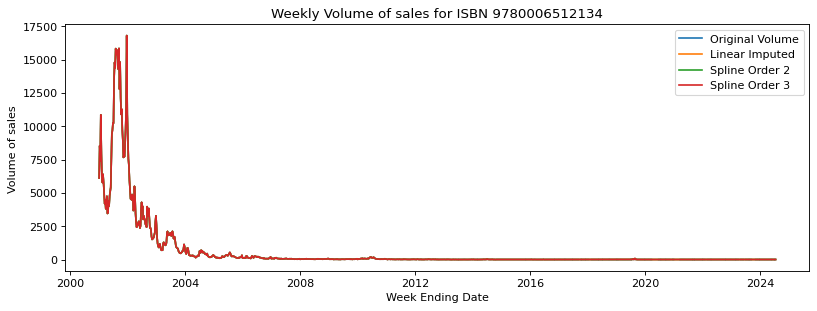

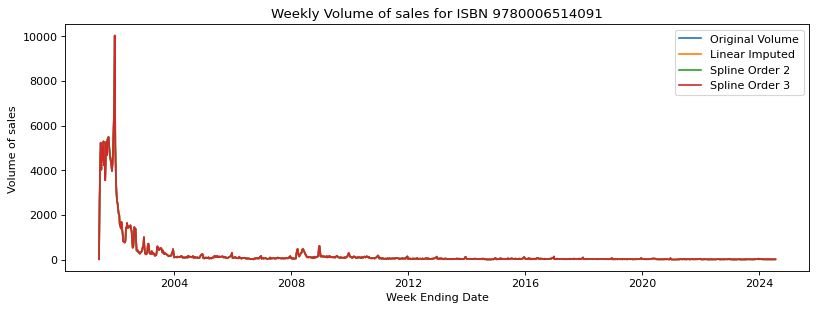

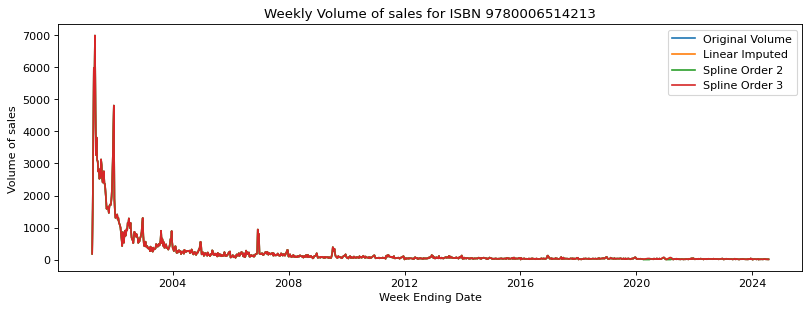

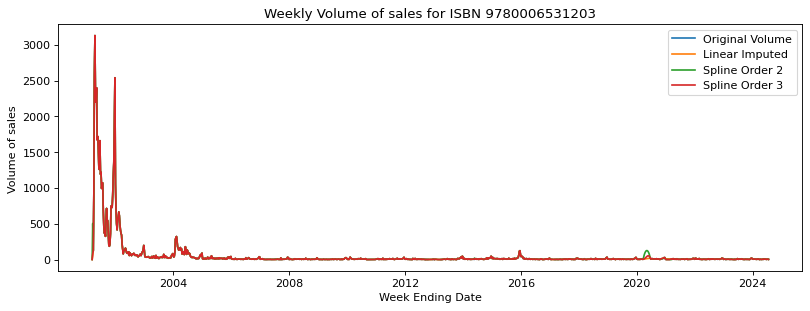

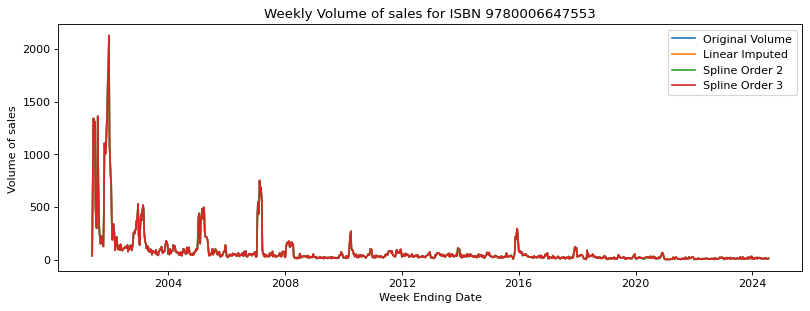

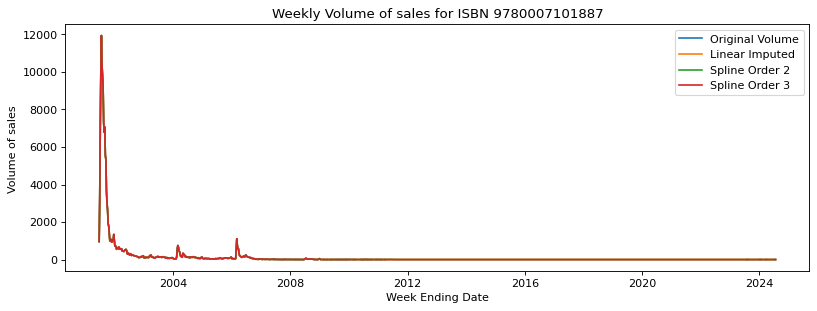

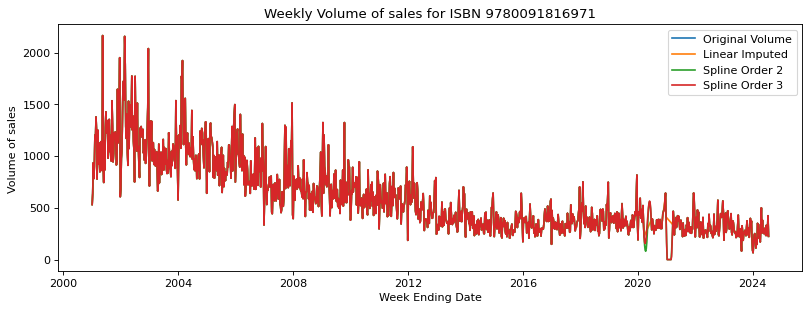

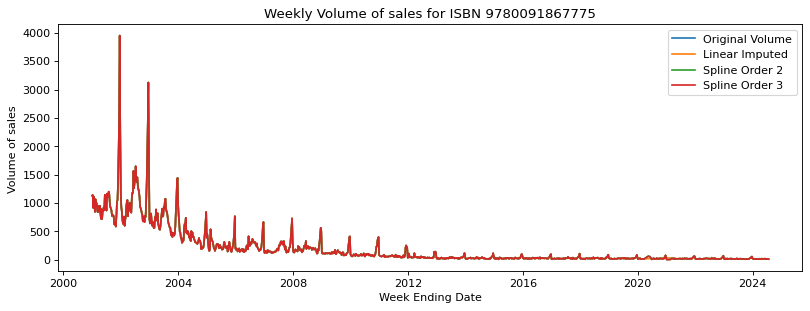

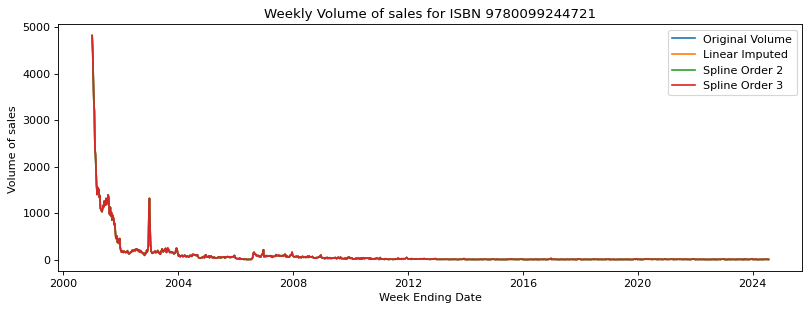

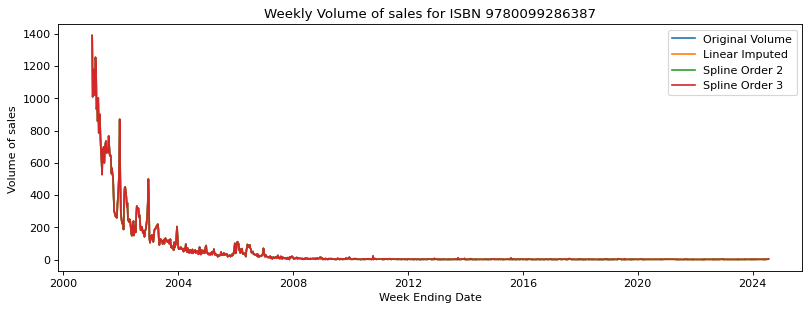

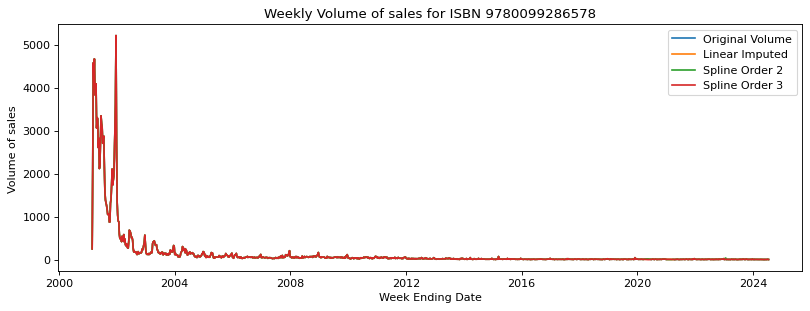

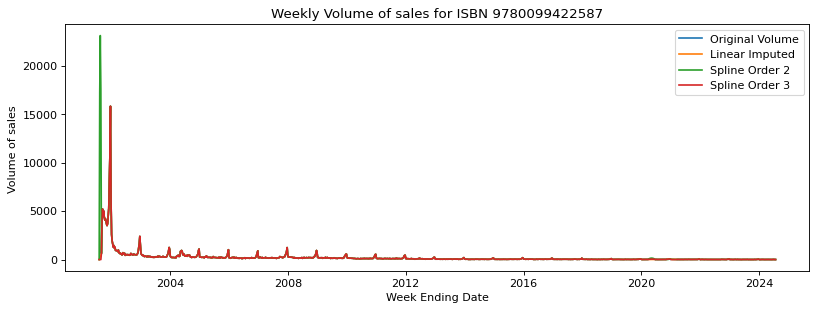

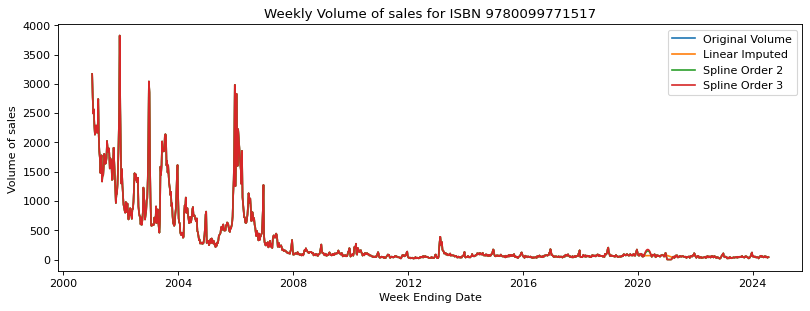

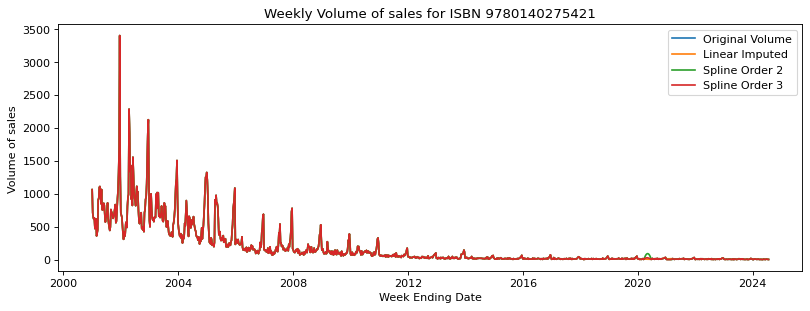

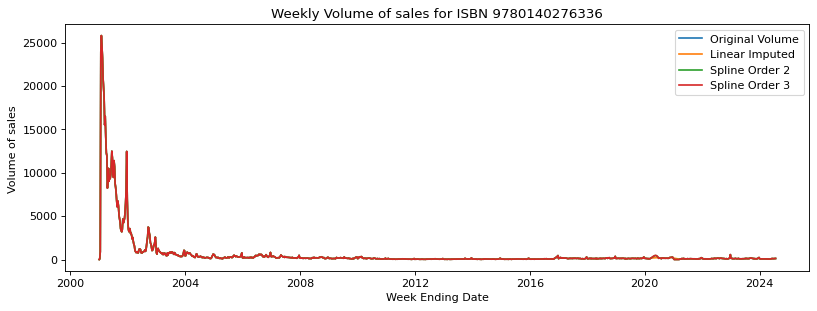

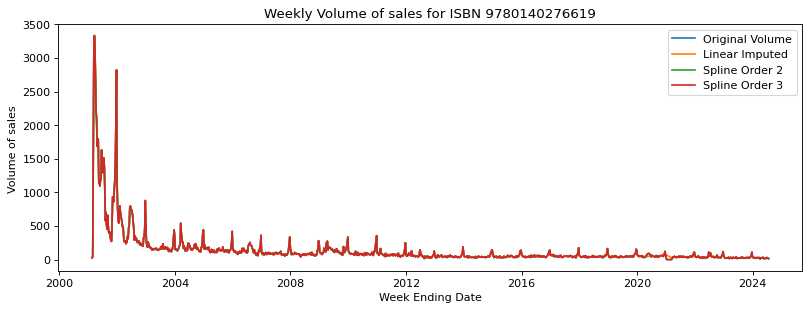

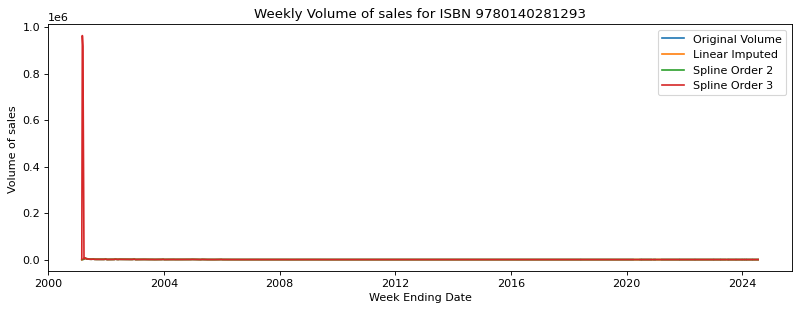

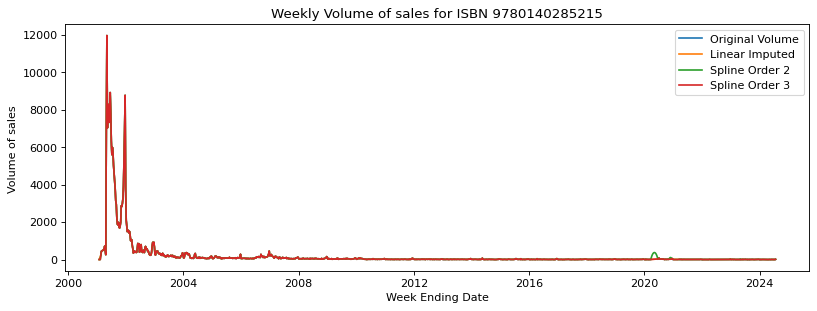

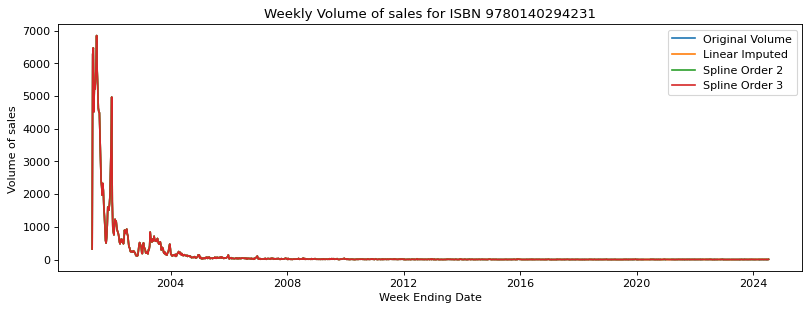

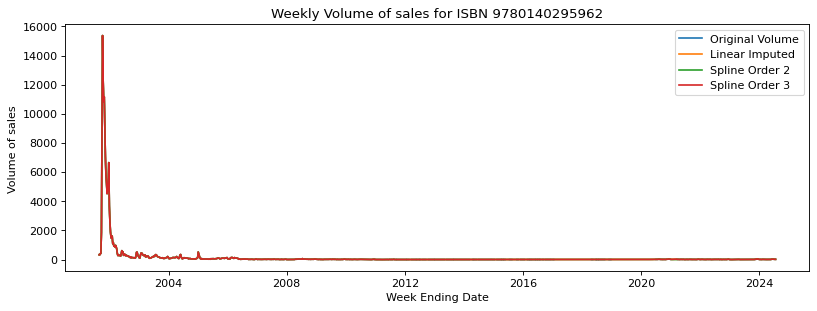

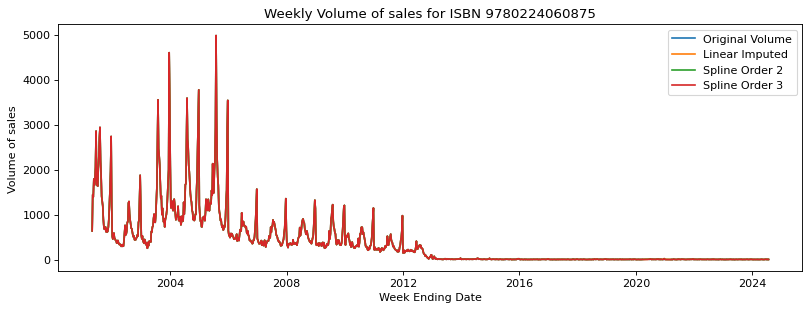

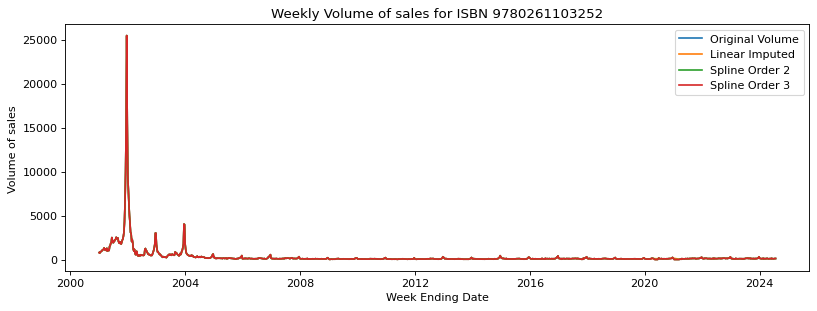

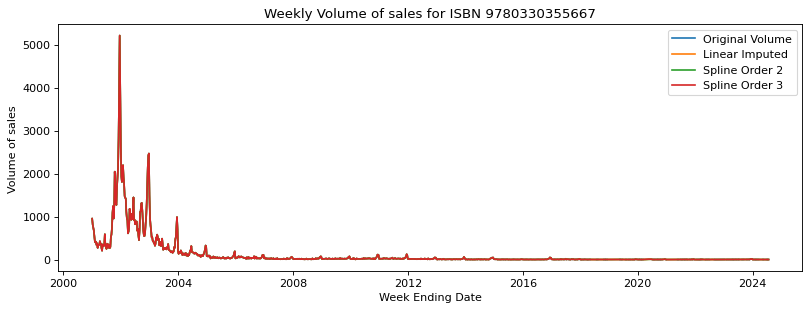

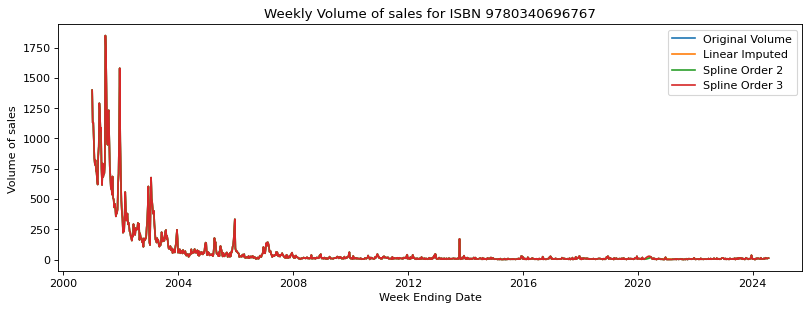

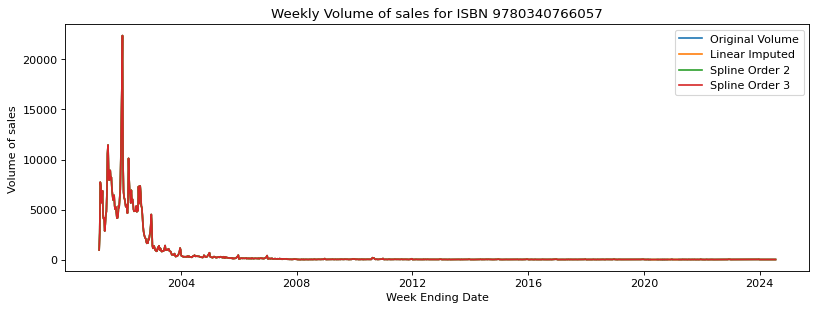

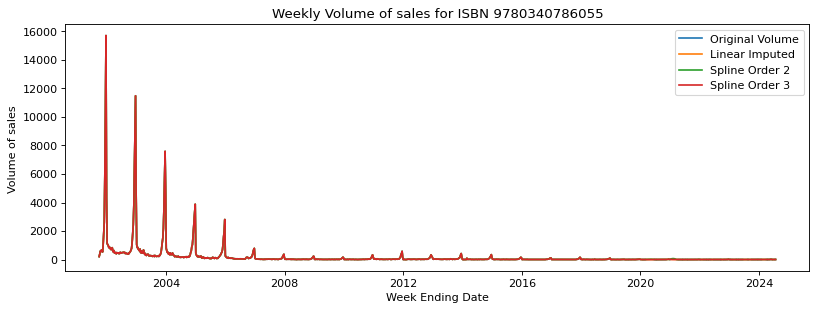

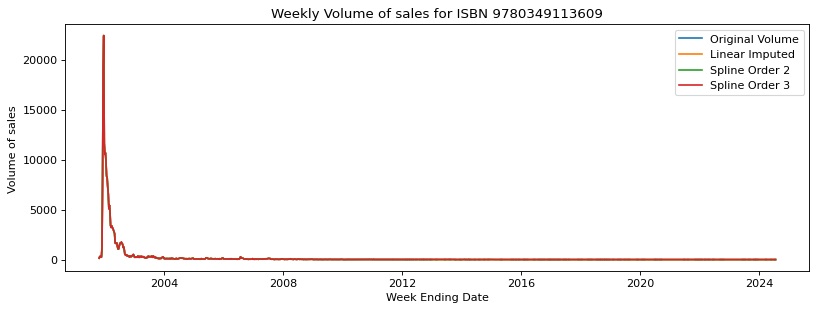

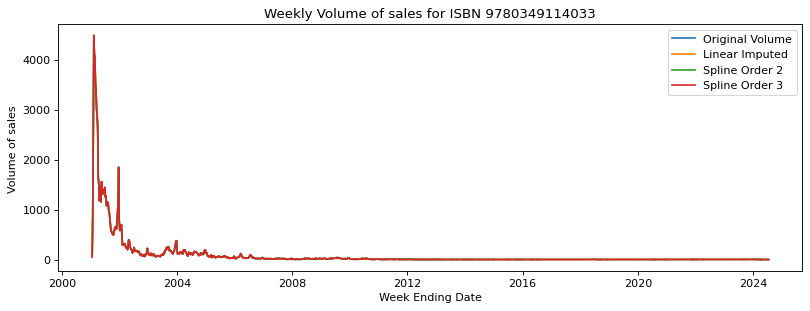

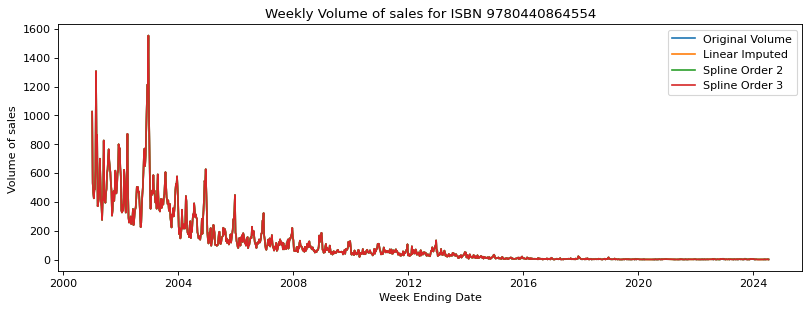

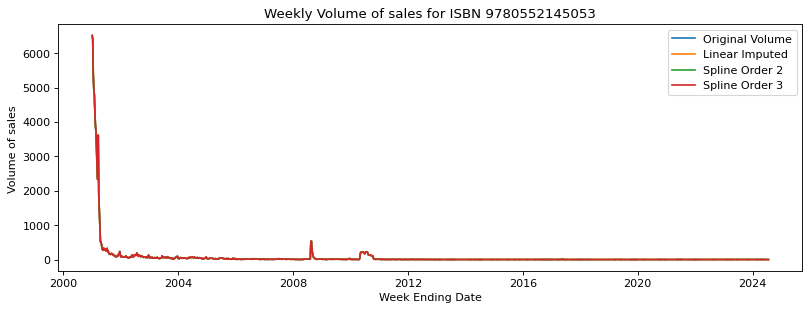

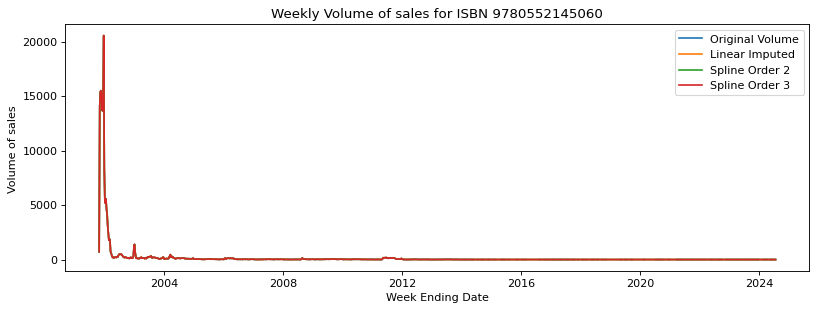

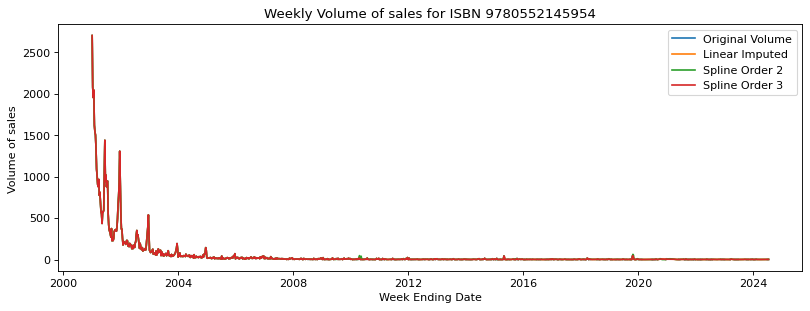

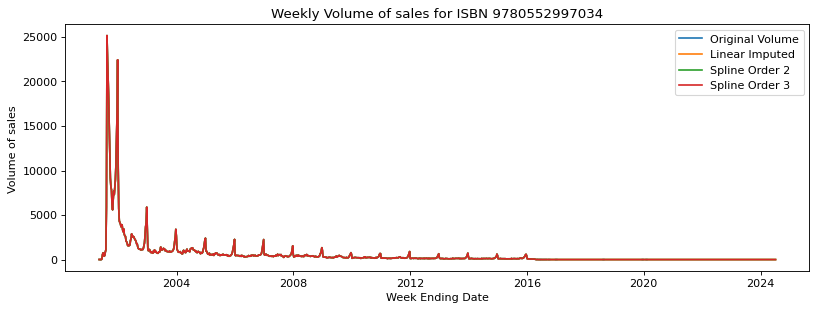

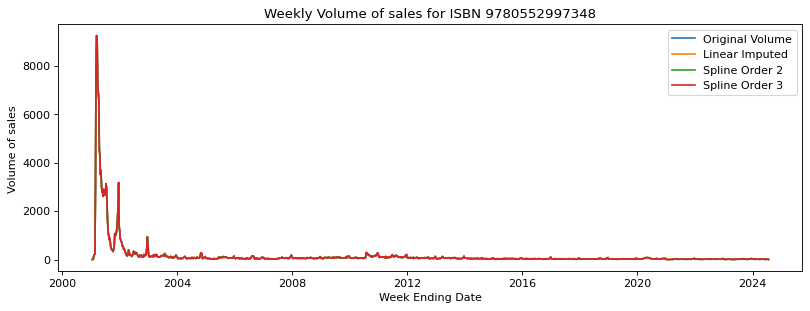

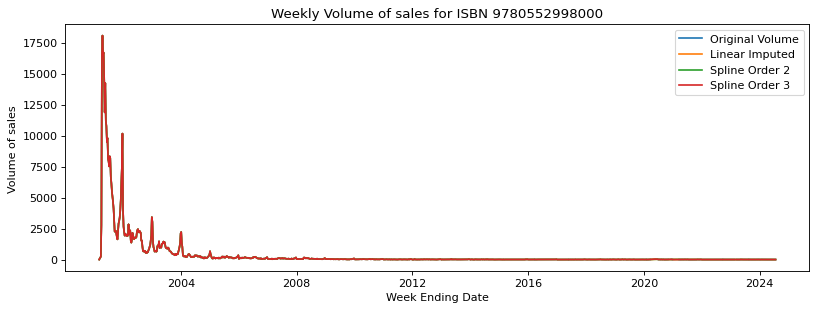

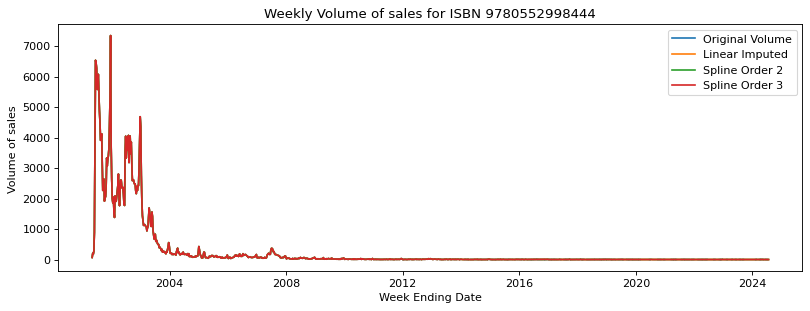

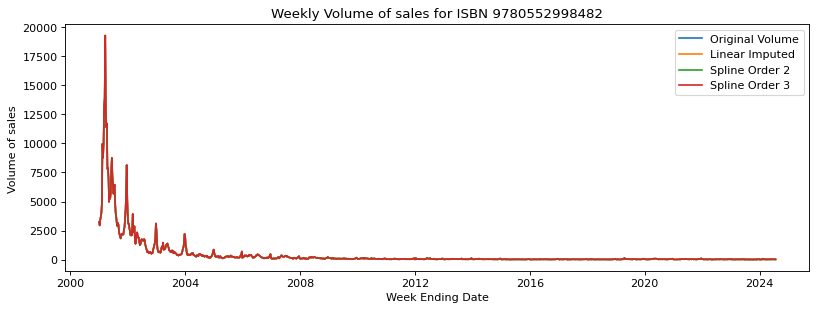

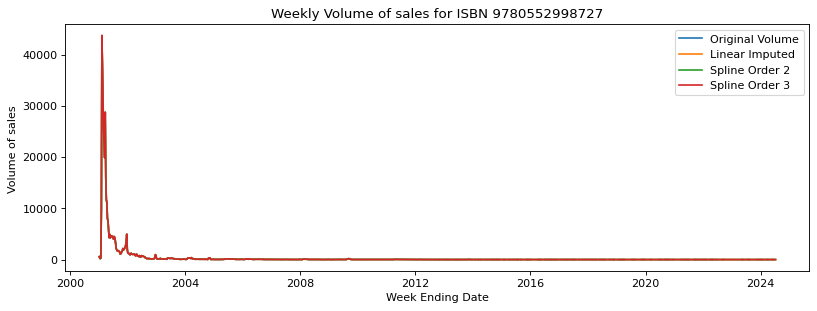

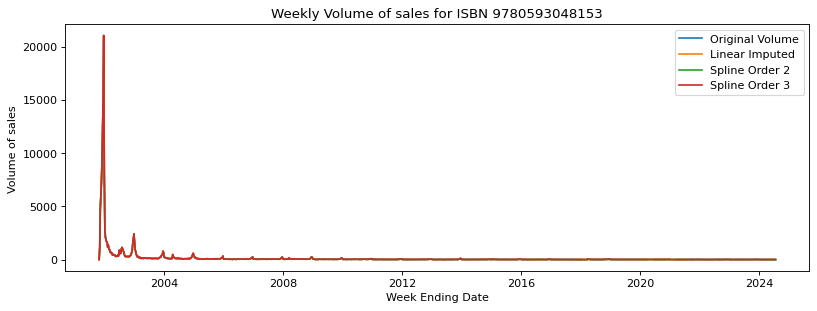

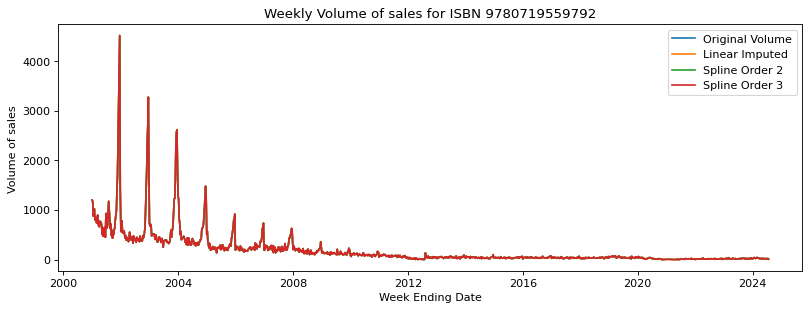

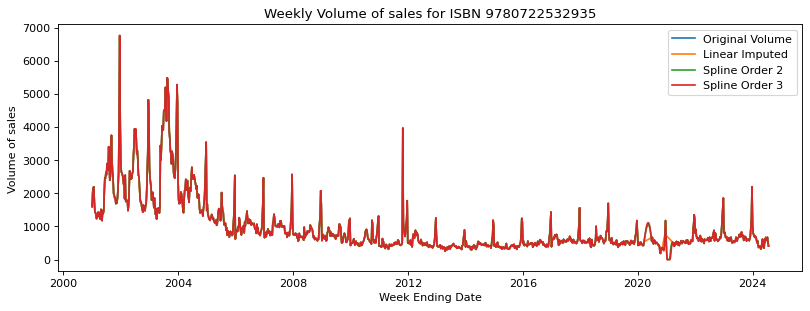

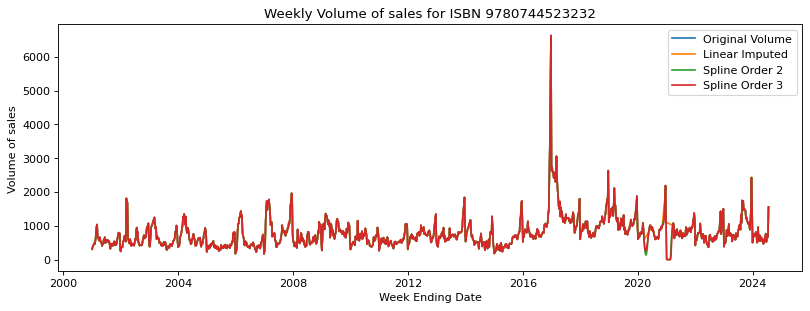

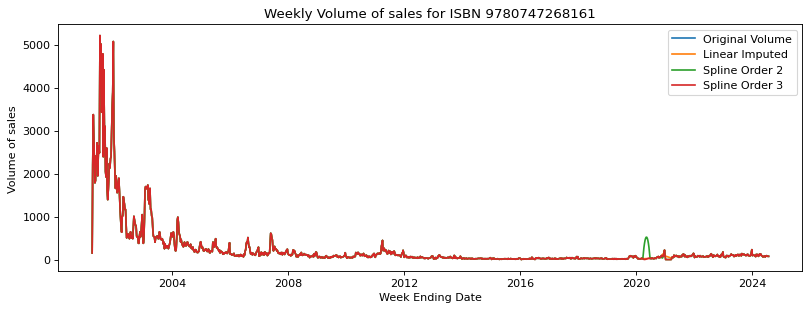

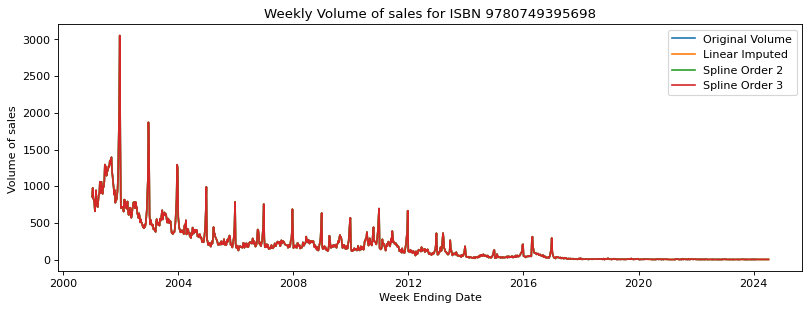

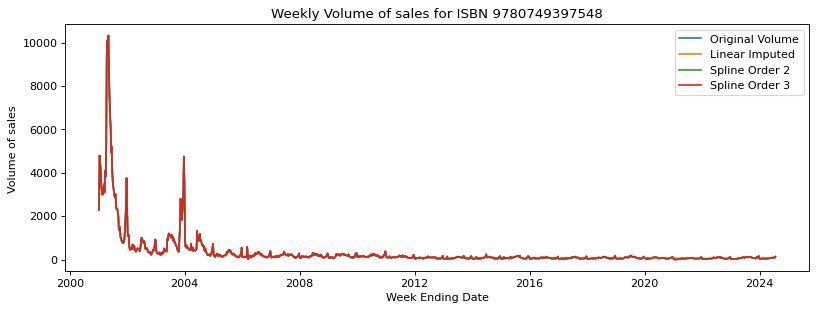

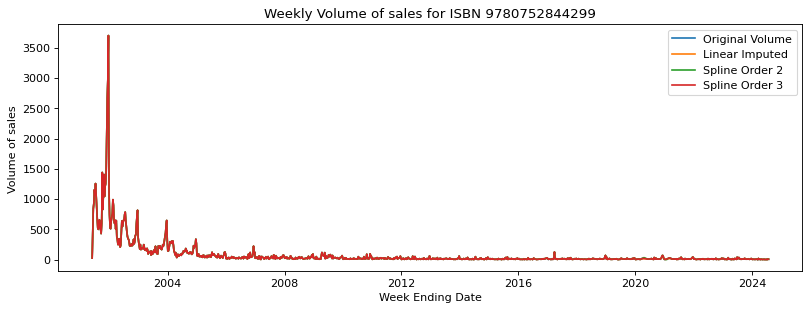

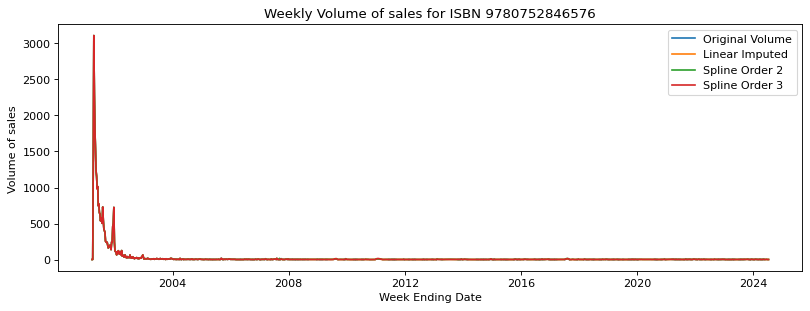

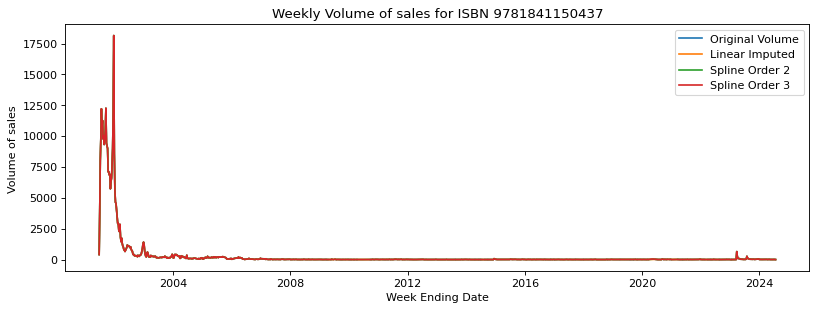

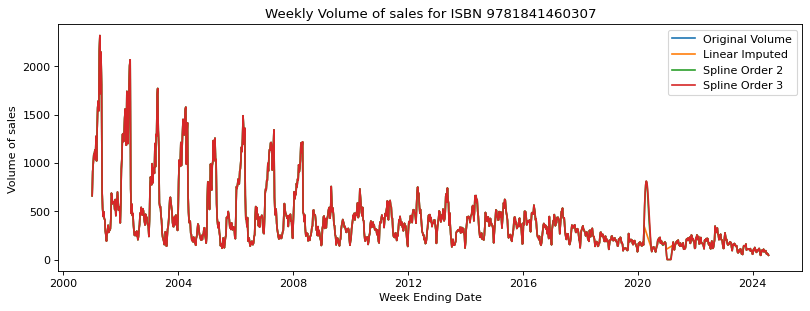

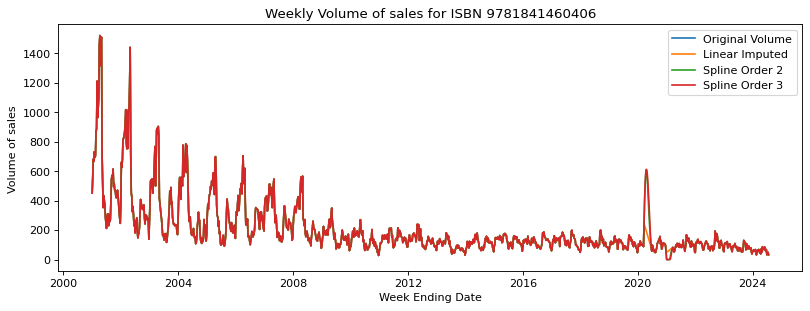

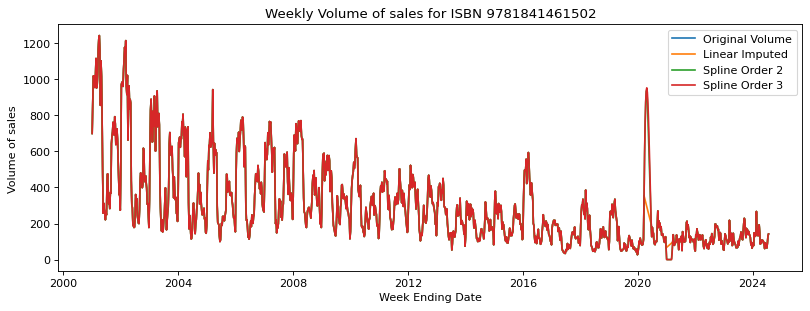

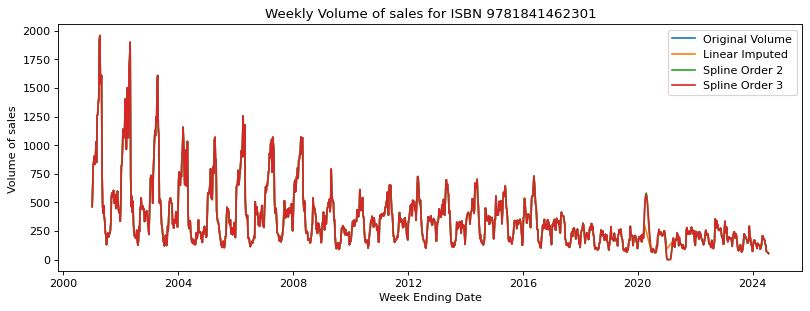

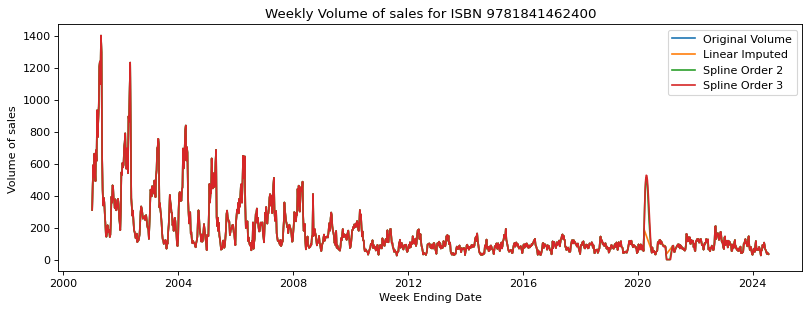

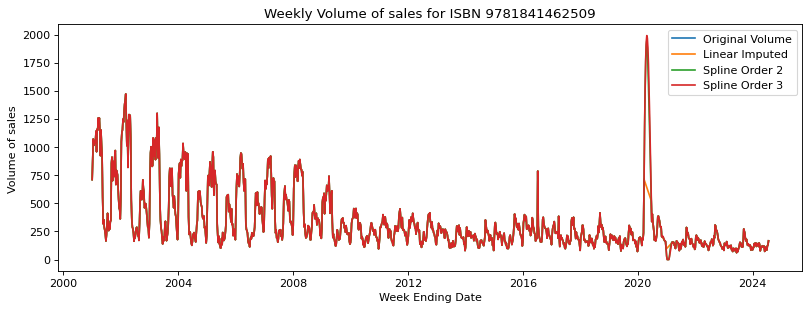

In [ ]:
# Plot ISBN that sold after July 2024 volumne
for isbn in isbn_sold_after_July_24:
    df_isbn = weekly_book_sales_df[weekly_book_sales_df['ISBN'] == isbn]

    plt.figure(figsize=(12, 4), dpi=80)

    plt.plot(df_isbn['End Date'], df_isbn['Volume'], label='Original Volume', linewidth=1.5)
    plt.plot(df_isbn['End Date'], df_isbn['Imputed_Volume_linear'], label='Linear Imputed', linewidth=1.5)
    plt.plot(df_isbn['End Date'], df_isbn['Imputed_Volume_spline_2'], label='Spline Order 2', linewidth=1.5)
    plt.plot(df_isbn['End Date'], df_isbn['Imputed_Volume_spline_3'], label='Spline Order 3', linewidth=1.5)

    plt.xlabel('Week Ending Date')
    plt.ylabel('Volume of sales ')
    plt.title(f'Weekly Volume of sales for ISBN {isbn}')
    plt.legend()

Many of the ISBNs' volume of sales time series plots exhibit multiplicative seasonality, with a sharp increase in sales during the festive period around December and the New Year (January).

All ISBNs show sales activity in the early 2000s. However, most display a negative trend over time, eventually plateauing to zero sales.

There are ISBN's that have huge volume of sales at the start and virtually none after a year

The ISBNs with the highest initial sales tend to have the longest continuous sales periods before tapering off to zero, compared to those that start with zero sales in their first week.

I've chosen to utilise linear imputation as the spline order 2 and order 3 did overshooting for certain weeks some negative before i clipped to zero. Linear sufficently cover the original volume data

### Select two books "The Alchemist and The Very Hungry Caterpillar" for further analysis with Focus on sales in the period after 01-01-2012

In [ ]:
# Review 'The Alchemist' Book data
The_Alchemist_data = weekly_book_sales_df[weekly_book_sales_df['ISBN'] == '9780722532935' ]

# Set End Date as index
The_Alchemist_data.set_index('End Date', inplace=True)

# Filter the Dataset so only records after 2012-01-01 remain
The_Alchemist_data = The_Alchemist_data.loc['2012-01-01':]

#Display
The_Alchemist_data.head()

ISBN           Title         Author  Interval  Volume  \
End Date                                                                     
2012-01-01  9780722532935  Alchemist, The  Coelho, Paulo    201152   499.0   
2012-01-08  9780722532935  Alchemist, The  Coelho, Paulo    201201   518.0   
2012-01-15  9780722532935  Alchemist, The  Coelho, Paulo    201202   533.0   
2012-01-22  9780722532935  Alchemist, The  Coelho, Paulo    201203   475.0   
2012-01-29  9780722532935  Alchemist, The  Coelho, Paulo    201204   514.0   

              Value     ASP   RRP    Binding   Imprint    Publisher Group  \
End Date                                                                    
2012-01-01  3507.91  7.0299  9.99  Paperback  Thorsons  HarperCollins Grp   
2012-01-08  3601.76  6.9532  9.99  Paperback  Thorsons  HarperCollins Grp   
2012-01-15  3610.12  6.7732  9.99  Paperback  Thorsons  HarperCollins Grp   
2012-01-22  3105.62  6.5381  9.99  Paperback  Thorsons  HarperCollins Grp   
2012-01-29  3431.29  6.6757  9.99  Paperback  Thorsons  HarperCollins Grp   

                              Product Class     Revenue  \
End Date                                                  
2012-01-01  F1.1 General & Literary Fiction  1750447.09   
2012-01-08  F1.1 General & Literary Fiction  1865711.68   
2012-01-15  F1.1 General & Literary Fiction  1924193.96   
2012-01-22  F1.1 General & Literary Fiction  1475169.50   
2012-01-29  F1.1 General & Literary Fiction  1763683.06   

           Country of Publication  Imputed_Volume_linear  \
End Date                                                   
2012-01-01         United Kingdom                  499.0   
2012-01-08         United Kingdom                  518.0   
2012-01-15         United Kingdom                  533.0   
2012-01-22         United Kingdom                  475.0   
2012-01-29         United Kingdom                  514.0   

            Imputed_Volume_spline_2  Imputed_Volume_spline_3  \
End Date                                                       
2012-01-01                    499.0                    499.0   
2012-01-08                    518.0                    518.0   
2012-01-15                    533.0                    533.0   
2012-01-22                    475.0                    475.0   
2012-01-29                    514.0                    514.0   

            Imputed_Revenue_linear  Imputed_Revenue_spline_2  \
End Date                                                       
2012-01-01              1750447.09                1750447.09   
2012-01-08              1865711.68                1865711.68   
2012-01-15              1924193.96                1924193.96   
2012-01-22              1475169.50                1475169.50   
2012-01-29              1763683.06                1763683.06   

            Imputed_Revenue_spline_3  
End Date                              
2012-01-01                1750447.09  
2012-01-08                1865711.68  
2012-01-15                1924193.96  
2012-01-22                1475169.50  
2012-01-29                1763683.06

In [ ]:
# Review 'Very Hungry Caterpillar'  Book Data
The_Very_Hungry_Caterpillar_data = weekly_book_sales_df[weekly_book_sales_df['ISBN'] == '9780241003008']

# Set End Date as index
The_Very_Hungry_Caterpillar_data.set_index('End Date', inplace=True)

# Filter the Dataset so only records after 2012-01-01 remain
The_Very_Hungry_Caterpillar_data = The_Very_Hungry_Caterpillar_data.loc['2012-01-01':]

#Display
The_Very_Hungry_Caterpillar_data.head()

ISBN                         Title       Author  \
End Date                                                               
2012-01-01  9780241003008  Very Hungry Caterpillar, The  Carle, Eric   
2012-01-08  9780241003008  Very Hungry Caterpillar, The  Carle, Eric   
2012-01-15  9780241003008  Very Hungry Caterpillar, The  Carle, Eric   
2012-01-22  9780241003008  Very Hungry Caterpillar, The  Carle, Eric   
2012-01-29  9780241003008  Very Hungry Caterpillar, The  Carle, Eric   

            Interval  Volume    Value     ASP   RRP   Binding       Imprint  \
End Date                                                                      
2012-01-01    201152   449.0  2317.98  5.1625  7.99  Hardback  Puffin Books   
2012-01-08    201201   512.0  2522.13  4.9260  7.99  Hardback  Puffin Books   
2012-01-15    201202   519.0  2473.31  4.7655  7.99  Hardback  Puffin Books   
2012-01-22    201203   574.0  2757.83  4.8046  7.99  Hardback  Puffin Books   
2012-01-29    201204   621.0  3072.66  4.9479  7.99  Hardback  Puffin Books   

           Publisher Group       Product Class     Revenue  \
End Date                                                     
2012-01-01     Penguin Grp  Y1.3 Picture Books  1040773.02   
2012-01-08     Penguin Grp  Y1.3 Picture Books  1291330.56   
2012-01-15     Penguin Grp  Y1.3 Picture Books  1283647.89   
2012-01-22     Penguin Grp  Y1.3 Picture Books  1582994.42   
2012-01-29     Penguin Grp  Y1.3 Picture Books  1908121.86   

           Country of Publication  Imputed_Volume_linear  \
End Date                                                   
2012-01-01         United Kingdom                  449.0   
2012-01-08         United Kingdom                  512.0   
2012-01-15         United Kingdom                  519.0   
2012-01-22         United Kingdom                  574.0   
2012-01-29         United Kingdom                  621.0   

            Imputed_Volume_spline_2  Imputed_Volume_spline_3  \
End Date                                                       
2012-01-01                    449.0                    449.0   
2012-01-08                    512.0                    512.0   
2012-01-15                    519.0                    519.0   
2012-01-22                    574.0                    574.0   
2012-01-29                    621.0                    621.0   

            Imputed_Revenue_linear  Imputed_Revenue_spline_2  \
End Date                                                       
2012-01-01              1040773.02                1040773.02   
2012-01-08              1291330.56                1291330.56   
2012-01-15              1283647.89                1283647.89   
2012-01-22              1582994.42                1582994.42   
2012-01-29              1908121.86                1908121.86   

            Imputed_Revenue_spline_3  
End Date                              
2012-01-01                1040773.02  
2012-01-08                1291330.56  
2012-01-15                1283647.89  
2012-01-22                1582994.42  
2012-01-29                1908121.86

In [ ]:
The_Alchemist_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 656 entries, 2012-01-01 to 2024-07-21
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ISBN                      656 non-null    object 
 1   Title                     656 non-null    object 
 2   Author                    656 non-null    object 
 3   Interval                  656 non-null    int64  
 4   Volume                    629 non-null    float64
 5   Value                     656 non-null    float64
 6   ASP                       629 non-null    float64
 7   RRP                       656 non-null    float64
 8   Binding                   656 non-null    object 
 9   Imprint                   656 non-null    object 
 10  Publisher Group           656 non-null    object 
 11  Product Class             656 non-null    object 
 12  Revenue                   629 non-null    float64
 13  Country of Publication    656 non-null    obje

In [ ]:
The_Very_Hungry_Caterpillar_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 656 entries, 2012-01-01 to 2024-07-21
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ISBN                      656 non-null    object 
 1   Title                     656 non-null    object 
 2   Author                    656 non-null    object 
 3   Interval                  656 non-null    int64  
 4   Volume                    629 non-null    float64
 5   Value                     656 non-null    float64
 6   ASP                       629 non-null    float64
 7   RRP                       656 non-null    float64
 8   Binding                   656 non-null    object 
 9   Imprint                   656 non-null    object 
 10  Publisher Group           656 non-null    object 
 11  Product Class             656 non-null    object 
 12  Revenue                   629 non-null    float64
 13  Country of Publication    656 non-null    obje

## Classical Techniques

-	Reviewing the time series plots for the volume of sales of the two books, it can be assumed that both are multiplicative, showing the amplitude of the peaks increasing  or decreasing in the dataset at times, however when transformation was performed, it was asuumed to be additive. The transformation flattened the trend, dampned the seasonal variation to near zero.

-	Since our data contained missing values, STL decomposition was selected as the best model to utilise, its also robust against outliers and can deal with weekly longterm data
-	We utilised period of 52 weeks to decompose our daa as our timeseries plots for the two books showed seasonality



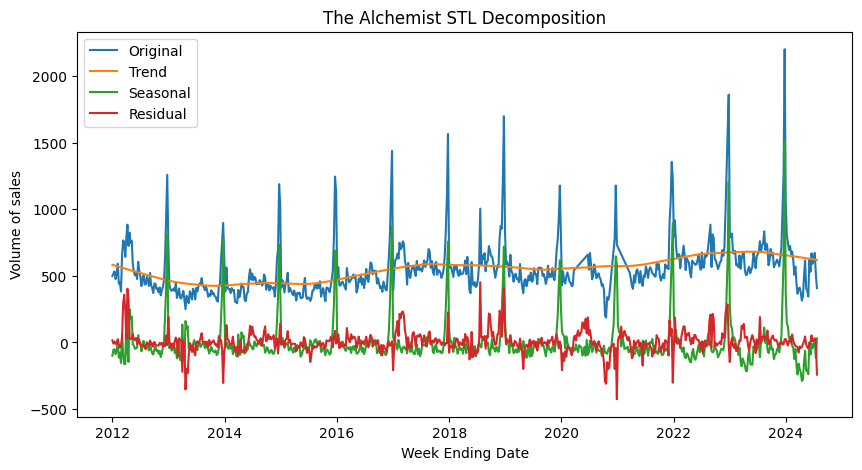

In [ ]:
from statsmodels.tsa.seasonal import STL

# STL Decompositon of the Alchemist Dataset
stl = STL(The_Alchemist_data['Imputed_Volume_linear'], period=52, robust=True)
res_1 = stl.fit()

# Add components to Alchemist data
The_Alchemist_data['stl_trend'] = res_1.trend
The_Alchemist_data['stl_seasonal'] = res_1.seasonal
The_Alchemist_data['stl_resid'] = res_1.resid

# Plot Components
plt.plot(The_Alchemist_data['Imputed_Volume_linear'], label='Original')
plt.plot(res_1.trend, label='Trend')
plt.plot(res_1.seasonal, label='Seasonal')
plt.plot(res_1.resid, label='Residual')
plt.xlabel('Week Ending Date')
plt.ylabel('Volume of sales')
plt.title('The Alchemist STL Decomposition')
plt.legend(loc='best')
plt.show()


In [ ]:
#Trend strength
print('Trend strenght:' , 1-np.var(res_1.resid)/np.var(res_1.resid + res_1.trend))

#Seasonality strength
print('Seasonality strength:' , 1-np.var(res_1.resid)/np.var(res_1.resid + res_1.seasonal))

Trend strenght: 0.5298352483424094
Seasonality strength: 0.7938971919414536


The seasonal component of the STL decompositon captures the seasonality of the original data well, the Fs (seasonality strenght) calculated was 0.79. Whereas Ft (Trend strenght) = 0.51, this indicates that trend is present in our data but weak.



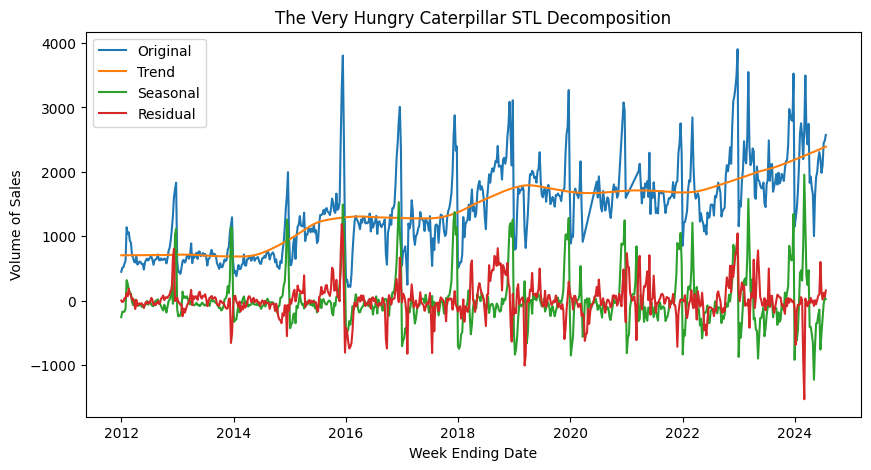

In [ ]:
# STL Decompositon of the very hungry caterpillar book
st2 = STL(The_Very_Hungry_Caterpillar_data['Imputed_Volume_linear'], period=52, robust=True)
res_2 = st2.fit()

# Add components to Hungry Caterpillar data
The_Very_Hungry_Caterpillar_data['stl_trend'] = res_2.trend
The_Very_Hungry_Caterpillar_data['stl_seasonal'] = res_2.seasonal
The_Very_Hungry_Caterpillar_data['stl_resid'] = res_2.resid

# Plot Components
plt.plot(The_Very_Hungry_Caterpillar_data['Imputed_Volume_linear'], label='Original')
plt.plot(res_2.trend, label='Trend')
plt.plot(res_2.seasonal, label='Seasonal')
plt.plot(res_2.resid, label='Residual')
plt.xlabel('Week Ending Date')
plt.ylabel('Volume of Sales')
plt.title('The Very Hungry Caterpillar STL Decomposition')
plt.legend(loc='best')
plt.show()


In [ ]:
#Trend strength
print('Trend strenght:' , 1-np.var(res_2.resid)/np.var(res_2.resid + res_2.trend))

#Seasonality strength
print('Seasonality strength:' , 1-np.var(res_2.resid)/np.var(res_2.resid + res_2.seasonal))

Trend strenght: 0.7845347329032263
Seasonality strength: 0.6748307144889526


Trend strength ≈ 0.78
This is quite high, indicating your volume data has a strong underlying trend.

Seasonality strength ≈ 0.67
This is also moderately high, meaning your data shows noticeable seasonal patterns with weekly data

<Figure size 1200x600 with 0 Axes>

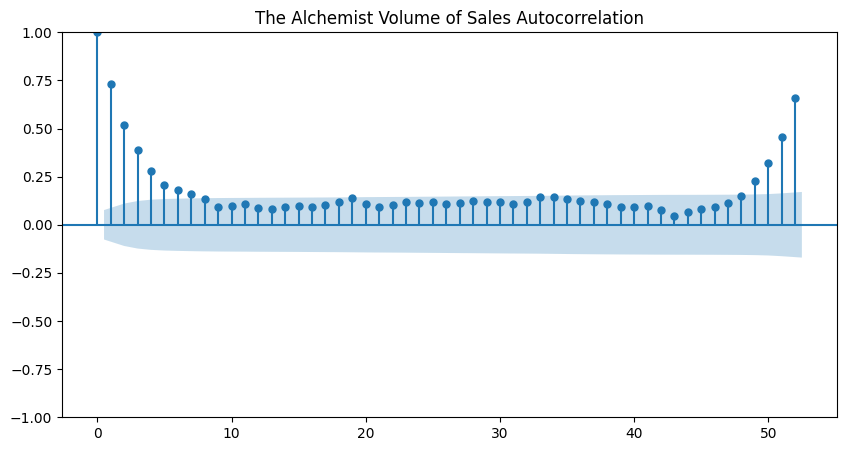

<Figure size 1200x600 with 0 Axes>

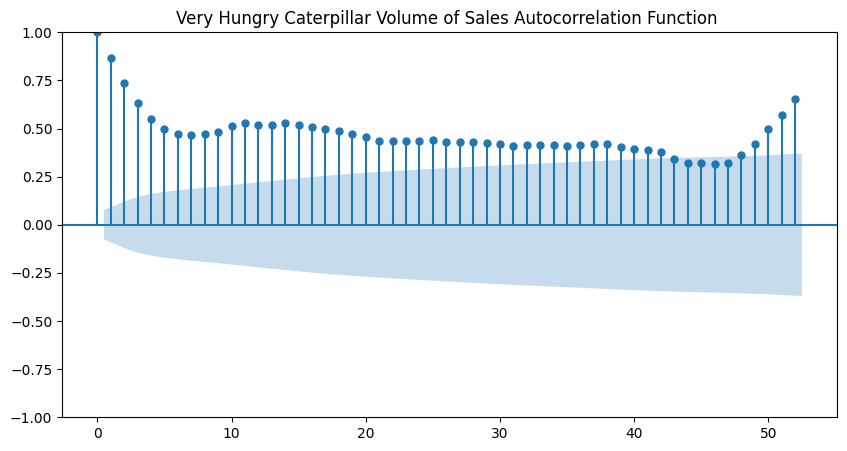

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

#Perform Acf on the Alchemist Data
plt.figure(figsize=(12, 6))
plot_acf(The_Alchemist_data['Imputed_Volume_linear'], lags=52)
plt.title('The Alchemist Volume of Sales Autocorrelation')
plt.show()

#Perform ACF on the Hungry Caterpillar Book Revenue
plt.figure(figsize=(12, 6))
plot_acf(The_Very_Hungry_Caterpillar_data['Imputed_Volume_linear'], lags=52)
plt.title('Very Hungry Caterpillar Volume of Sales Autocorrelation Function ')
plt.show()

-	The Alchemist Book Volume of Sales, shows positive autocorrelation with a sharp decay in autocorrelation after the first lag. Only the first lag is significant and influences the current volume of sales.

-	The Very Hungry Caterpillar volume sales shows decay  albeight less sharply then the alchemist, only the first lag is statistically significant to the current revenue.

-	High spike at week 52 which indicates seasonality for both books

-	Only the week before volume of sales influences current volume of sales


<Figure size 1200x600 with 0 Axes>

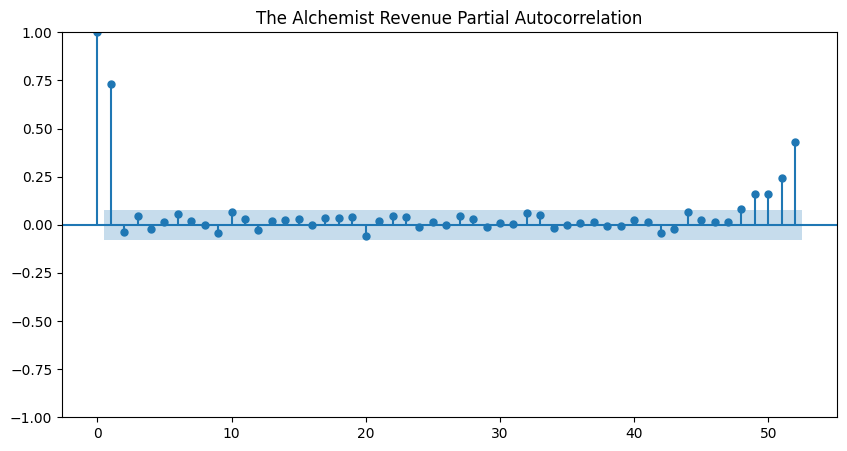

<Figure size 1200x600 with 0 Axes>

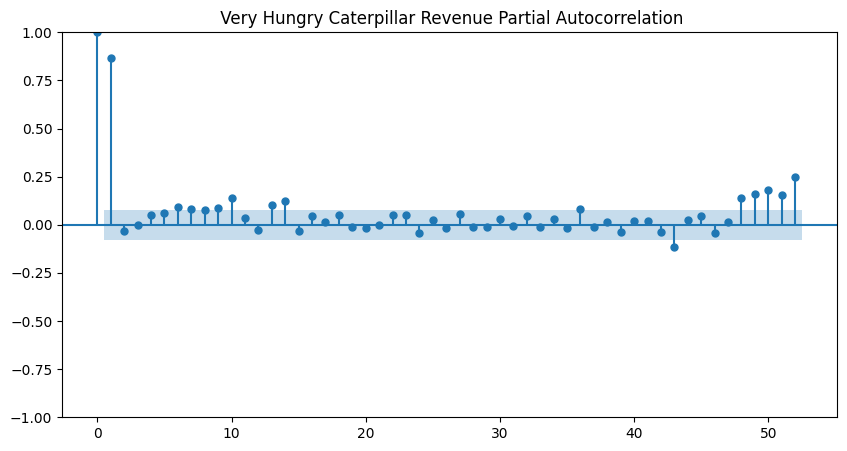

In [ ]:
#Perform PACF on the Alchemist Book
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(12, 6))
plot_pacf(The_Alchemist_data['Imputed_Volume_linear'], lags=52)
plt.title('The Alchemist Revenue Partial Autocorrelation')
plt.show()

#Perform PACFG on the Very Hungry Caterpillar Book
plt.figure(figsize=(12, 6))
plot_pacf(The_Very_Hungry_Caterpillar_data['Imputed_Volume_linear'], lags=52)
plt.title(' Very Hungry Caterpillar Revenue Partial Autocorrelation')
plt.show()

The PACF Plot for the Alchemist shows positive correlation for the first two lags, however after that the PACF shows no Correlation, there is a spike after week 52 which indicates seasonality.

In [ ]:
# Check for Stationarity of the linear imputed volume for both books
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
res_1_Alchemist = adfuller(The_Alchemist_data['Imputed_Volume_linear'])
res_2_Hungry_Caterpillar = adfuller(The_Very_Hungry_Caterpillar_data['Imputed_Volume_linear'])

print('p-value for The Alchemist:', res_1_Alchemist[1])
print('p-value for The Very Hungry Caterpillar:', res_2_Hungry_Caterpillar[1])


p-value for The Alchemist: 1.3676768007780453e-17
p-value for The Very Hungry Caterpillar: 0.18079331571797674


The Alchemist shows a p value (1.36x10-17) which is less than 0.05, so we reject the null hypothesis and assume the volume of sales feature is stationary. Whereas the p value (0.18) for 'The Very Hungry Caterpillar is greater than 0.05 and we fail to reject the null hypothesis and assume the volume sales feature  is non-stationary based on the adfuller stationarity test.

## Performing Auto Arima

In [1]:
#Alchemist Book:
ts_Alchemist = The_Alchemist_data['Imputed_Volume_linear']

#Very Hungry Caterpillar Book:
ts_Hungry_Caterpillar = The_Very_Hungry_Caterpillar_data['Imputed_Volume_linear']

NameError: name 'The_Alchemist_data' is not defined

In [ ]:
forecast_period = 32
lookback_period = 52*5

In [ ]:
import multiprocessing
import joblib

In [ ]:
forecast_period = 32
lookback_period = 52*5
n_jobs = max(1, multiprocessing.cpu_count() - 1)

ts_Alchemist_train = ts_Alchemist.iloc[:-forecast_period]
ts_Alchemist_test = ts_Alchemist.iloc[-forecast_period:]
ts_Alchemist_train_subset = ts_Alchemist.iloc[-forecast_period-lookback_period:-forecast_period]

#Fit Auto Arima model to Alchemist training data with the below specified bound:
model_alchemist_week = auto_arima(y=ts_Alchemist_train_subset, m=52, start_p=0, max_p=2,start_q=0, max_q=2,seasonal=True,d=0, max_d=1, start_P=0, max_P=2, start_Q=0, max_Q=1,D=None, max_D=1, max_order=8,information_criterion='aic', test='kpss', seasonal_test='ocsb', maxiter=20, step_wise=True, n_jobs=n_jobs, suppress_warnings=True, error_action='ignore' )

#Display
print(model_alchemist_week.summary())

#save
joblib.dump(model_alchemist_week, '/content/drive/MyDrive/model_alchemist_week.pkl')

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  260
Model:             SARIMAX(2, 0, 1)x(1, 0, [], 52)   Log Likelihood               -1589.905
Date:                             Wed, 04 Jun 2025   AIC                           3191.810
Time:                                     13:11:02   BIC                           3213.174
Sample:                                 12-23-2018   HQIC                          3200.398
                                      - 12-10-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    140.1433     83.824      1.672      0.095     -24.149     304.435
ar.L1         -0.1318      

['/content/drive/MyDrive/model_alchemist_week.pkl']

The Best model selected by Auto arima had the following parameters:
Non-seasonal: (p=2, d=0, q=1)
Seasonal part: (P=1, D=0, Q=0, m=52)

Seasonal component (lag 52) is Highly significant (p < 0.001) — this confirms strong yearly seasonality

The ljung box p-value < 0.05 and the null hypothesis is rejected meaning some of the residuals are autocorrelated, this indicate the model has missed some patterns or lags in the data, a reason for this is insufficent historical data, as we are utilising only 5 years of historic data in this model.

The AIC, BIC and HQIC are close to each other which suggests the model has reasonable complexity

In [ ]:
#Load Alchemist Model
model_alchemist_week = joblib.load('/content/drive/MyDrive/model_alchemist_week.pkl')

Commentary on Auto Arima model on the Alchemist Book Results
- selected a range of 1-2 for p
-selected a range of 1-2 for q
- selcted range of 0-1 for P and Q
-
Seasonal True as Data shows Seasonal patterns
- the data is stationary following adft test, so we have a d=0 and max_d=1
-max_order=8

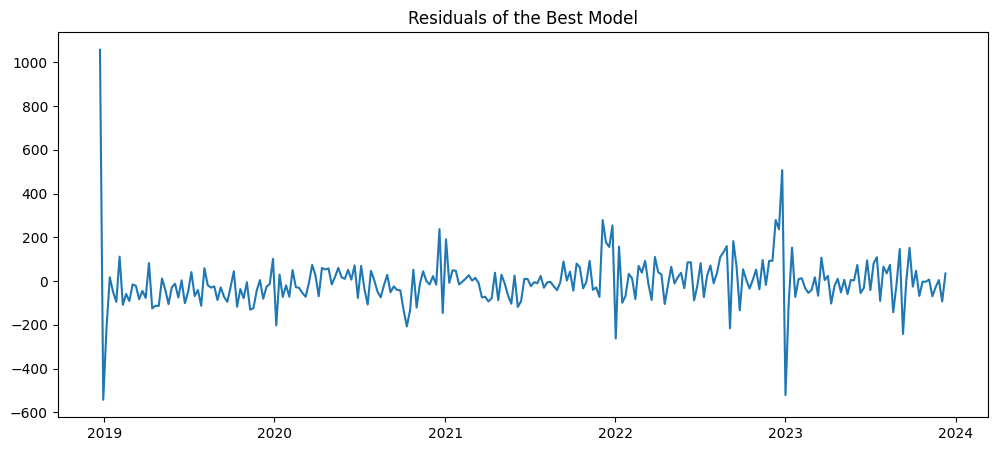

In [ ]:
# Residuals of the best model for the Alchemist
residuals_alchemist = model_alchemist_week.resid()

# Plot residuals
plt.figure(figsize=(12, 5))
plt.plot(residuals_alchemist)
plt.title('Residuals of the Best Model')
plt.show()

The model had a poor fit for the initial investigations maybe due to an outlier, after the intial the model shows good performance as the resuduals dont show clear structure or trend and behave like white noise around zero.

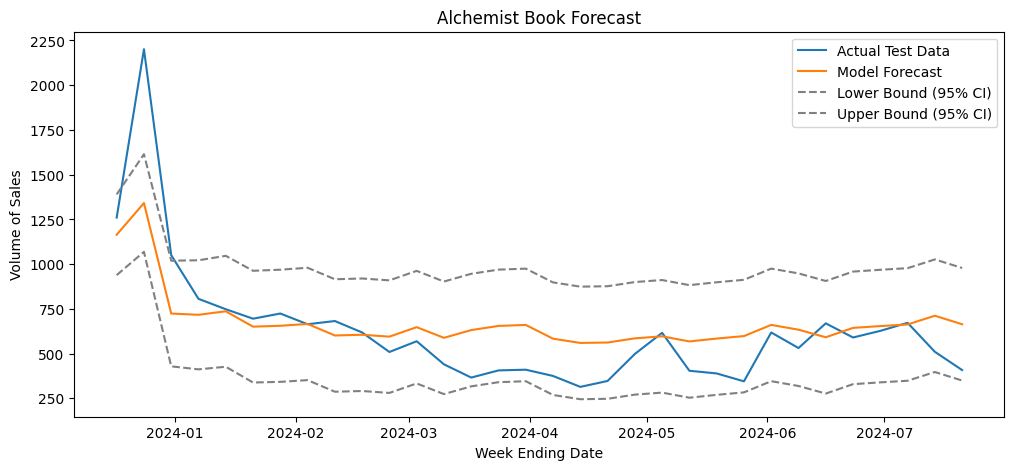

In [ ]:
forecast_alchemist, conf_int = model_alchemist_week.predict(n_periods=forecast_period, return_conf_int=True, alpha=0.05)

plt.figure(figsize=(12, 5))

# Plot actual test data
plt.plot(ts_Alchemist_test.index, ts_Alchemist_test, label='Actual Test Data')

# Model Forecast line
forecast_index = ts_Alchemist_test.index
plt.plot(forecast_index, forecast_alchemist, label='Model Forecast')

# Plot confidence interval lines
plt.plot(forecast_index, conf_int[:, 0], linestyle='--', color='gray', label='Lower Bound (95% CI)')
plt.plot(forecast_index, conf_int[:, 1], linestyle='--', color='gray', label='Upper Bound (95% CI)')

plt.title('Alchemist Book Forecast')
plt.xlabel('Week Ending Date')
plt.ylabel('Volume of Sales')
plt.legend()
plt.show()

In [ ]:
# Focusing on subset of the data as the training data (last 5 years)
forecast_period = 32
lookback_period = 52*5

ts_Hungry_Caterpillar_train = ts_Hungry_Caterpillar.iloc[:-forecast_period]
ts_Hungry_Caterpillar_test = ts_Hungry_Caterpillar.iloc[-forecast_period:]
ts_Hungry_Caterpillar_subset = ts_Hungry_Caterpillar.iloc[-forecast_period-lookback_period:-forecast_period]

#Fit Auto Arima model to Hungry Caterpillar Book training data with the below specified bound:
model_Hungry_Caterpillar_week = auto_arima(y=ts_Hungry_Caterpillar_subset, m=52, start_p=1, max_p=2,start_q=1, max_q=2,seasonal=True,d=1, start_P=1, max_P=2, start_Q=1, max_Q=2, max_order=8,information_criterion='aic', test='kpss', seasonal_test='ocsb', maxiter=20, step_wise=True, n_jobs=n_jobs, suppress_warnings=True, error_action='ignore')

#Display
print(model_Hungry_Caterpillar_week.summary())

#save
joblib.dump(model_Hungry_Caterpillar_week, '/content/drive/MyDrive/model_Hungry_Caterpillar_week.pkl')

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  260
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 52)   Log Likelihood               -1851.473
Date:                             Wed, 04 Jun 2025   AIC                           3712.945
Time:                                     13:19:00   BIC                           3730.729
Sample:                                 12-23-2018   HQIC                          3720.095
                                      - 12-10-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2424      1.679      0.144      0.885      -3.049       3.534
ar.L1          0.6080      

['/content/drive/MyDrive/model_Hungry_Caterpillar_week.pkl']

The best model selected by Auto ARIMA had the following parameters:
Non-seasonal: (p=1, d=1, q=1)
Seasonal: (P=1, D=0, Q=0, m=52)

The seasonal component (lag 52) is highly significant (p < 0.001) — confirming strong yearly seasonality.

The Ljung-Box p-value = 0.57, which is greater than 0.05, means we fail to reject the null hypothesis. This suggests that the residuals are not autocorrelated, indicating the model has captured most of the patterns in the data.

The AIC (3712.95), BIC (3730.73), and HQIC (3720.10) are close, suggesting the model has a balanced and reasonable complexity.


In [ ]:
#load Hungry_caterpillar autoarima model
model_Hungry_Caterpillar_week = joblib.load('/content/drive/MyDrive/model_Hungry_Caterpillar_week.pkl')

Commentary on Auto Arima model on the Hungry Caterpillar Results

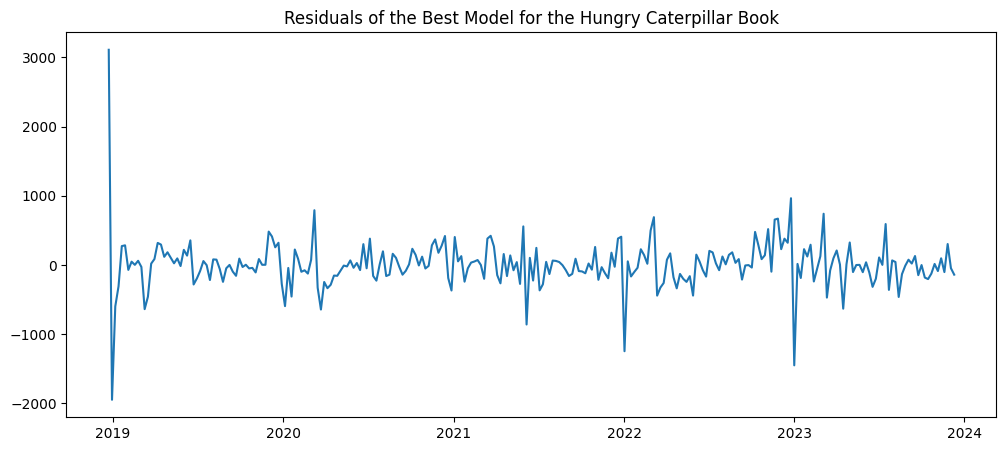

In [ ]:
# Residuals of the best model for the Hungry Caterpillar
residuals_Hungry_Caterpillar = model_Hungry_Caterpillar_week.resid()

# Plot residuals
plt.figure(figsize=(12, 5))
plt.plot(residuals_Hungry_Caterpillar)
plt.title('Residuals of the Best Model for the Hungry Caterpillar Book')
plt.show()

Similar to the Alchemist Resiudals plot, the residuals fluctuate around zero confirming they don't have a trend, seasonality or patterns

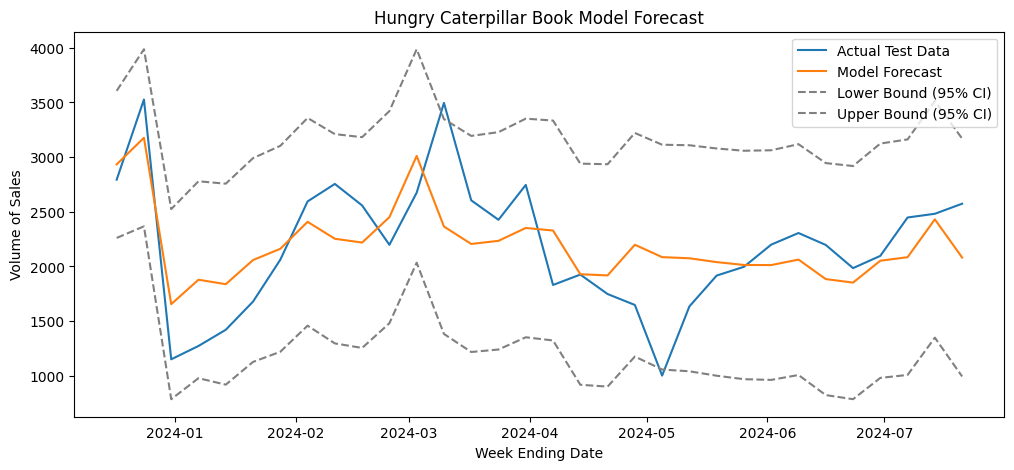

In [ ]:
forecast_Hungry_Caterpillar, conf_int = model_Hungry_Caterpillar_week.predict(n_periods=forecast_period, return_conf_int=True, alpha=0.05)

plt.figure(figsize=(12, 5))

# Plot actual test data
plt.plot(ts_Hungry_Caterpillar_test.index, ts_Hungry_Caterpillar_test, label='Actual Test Data')

# Model Forecast line
forecast_index = ts_Hungry_Caterpillar_test.index
plt.plot(forecast_index, forecast_Hungry_Caterpillar, label='Model Forecast')

# Plot confidence interval lines
plt.plot(forecast_index, conf_int[:, 0], linestyle='--', color='gray', label='Lower Bound (95% CI)')
plt.plot(forecast_index, conf_int[:, 1], linestyle='--', color='gray', label='Upper Bound (95% CI)')

plt.title('Hungry Caterpillar Book Model Forecast')
plt.xlabel('Week Ending Date')
plt.ylabel('Volume of Sales')
plt.legend()
plt.show()

the Sarima model does well with most of the actual data inside the 95% confidence interval, the model captures the trend but underestimates sharp peaks and falls

## Machine learning and deep learning techniques

### XGBOOST

For the XGBoost model, the training data included all data from 2012 onward, excluding the last 32 weeks, which were reserved as test data to evaluate model performance.

To capture the seasonality and trend in the datasets, deseasonalizing and detrending techniques were applied.

The model was tuned on several hyperparameters, including window length, max_depth, gamma, and reg_alpha, as shown in the code below.

The best hyperparameters and forecasting model were selected and then used to predict the final 32 weeks.

In [ ]:
# Function to tune XGBoost
def tune_xgb_forecaster(data, target_col='Imputed_Volume_linear', freq='W-SUN', forecast_horizon=32):


    data = data.copy()
    data.index = pd.to_datetime(data.index)
    data.index = data.index.to_period(freq)

    #Split the data
    y = data[target_col].copy()
    y_train = y.iloc[:-forecast_horizon]
    y_test = y.iloc[-forecast_horizon:]


    # Define the regressor model
    regressor = XGBRegressor(
        n_estimators=400,
        tree_method='gpu_hist',
        predictor='gpu_predictor',
        booster='gbtree',
        seed=0

    )

    def create_forecaster(window_length):
        reduced_model = make_reduction(regressor, window_length=window_length, strategy="recursive")
        return TransformedTargetForecaster(steps=[
            ("deseasonalize", Deseasonalizer(sp=52, model='additive')),
            ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=1))),
            ("forecast", reduced_model)
        ])

    forecaster = create_forecaster(window_length=4)

    # Define Parameter Grid
    param_grid = {
        'forecast__window_length': [5, 15, 25],
        'forecast__max_depth': [4, 7],
        'forecast__gamma': [0, 1,],
        'forecast__reg_alpha': [0, 20],
    }

    cv = ExpandingWindowSplitter(initial_window=int(len(y_train) * 0.7))

    gscv = ForecastingGridSearchCV(
        forecaster,
        strategy="refit",
        cv=cv,
        param_grid=param_grid,
        scoring=MeanAbsolutePercentageError(symmetric=True)
    )

    gscv.fit(y_train)

    best_forecaster = gscv.best_forecaster_
    best_params = gscv.best_params_

    return y_train, y_test, best_forecaster, best_params

In [ ]:
# Identify the Best Params for the XGBoost for the Alchemist Data
y_train_al, y_test_al, best_forecaster_al, best_params_al = tune_xgb_forecaster(The_Alchemist_data)
print("Best Parameters found for Alchemist Dataset:", best_params_al)

joblib.dump(best_forecaster_al, '/content/drive/MyDrive/best_forecaster_al.pkl')

Best Parameters found for Alchemist Dataset: {'forecast__gamma': 0, 'forecast__max_depth': 4, 'forecast__reg_alpha': 0, 'forecast__window_length': 25}


NameError: name 'joblib' is not defined

In [ ]:
import joblib

joblib.dump(best_forecaster_al, '/content/drive/MyDrive/best_forecaster_al.pkl')

['/content/drive/MyDrive/best_forecaster_al.pkl']

In [ ]:
# Load the Bestforecaster model
best_forecaster_al = joblib.load('/content/drive/MyDrive/best_forecaster_al.pkl')

In [ ]:
# Fit the best forecaster to the training data
best_forecaster_al.fit(y_train_al)

# Define forecast horizon
fh = np.arange(1, 33)

# Predict next 32 weeks
y_pred_al = best_forecaster_al.predict(fh=fh)

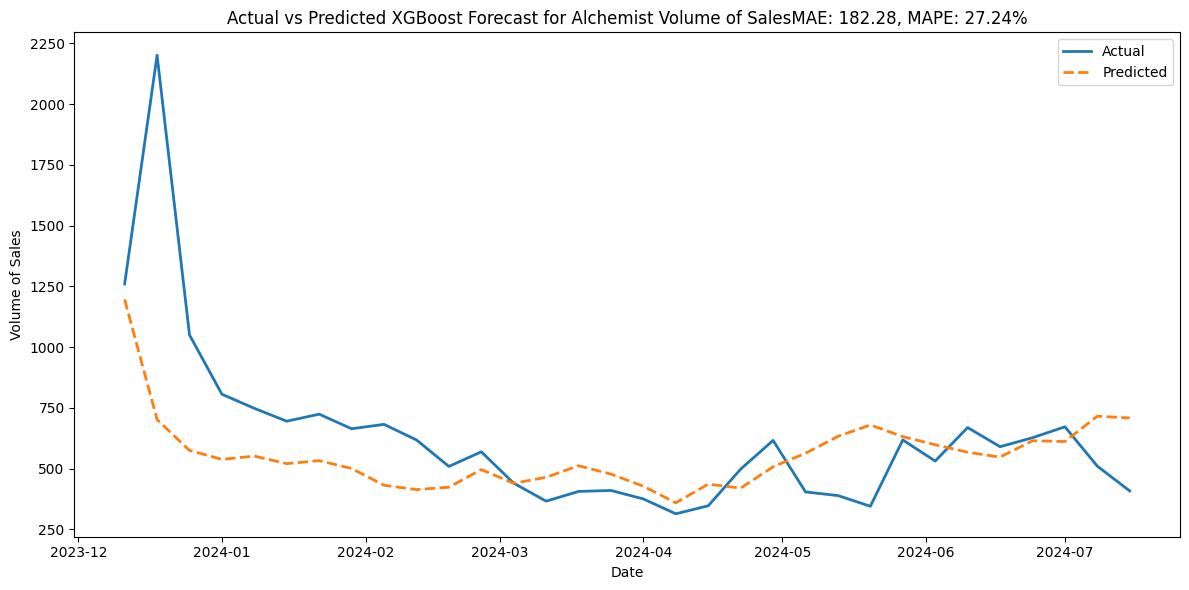

In [ ]:
# Compute MAE and MAPE
mae_al = mean_absolute_error(y_test_al, y_pred_al)
mape_al = mean_absolute_percentage_error(y_test_al, y_pred_al)

# Plot the original data along with the predictions for the Alchemist Dataset
x_axis_al = y_test_al.index.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(x_axis_al, y_test_al.values, label="Actual", linewidth=2)
plt.plot(x_axis_al, y_pred_al.values, label="Predicted", linestyle="--", linewidth=2)
plt.xlabel("Date")
plt.ylabel("Volume of Sales")
plt.title(
    "Actual vs Predicted XGBoost Forecast for Alchemist Volume of Sales"
    f"MAE: {mae_al:.2f}, MAPE: {mape_al:.2%}"
)
plt.legend()
plt.tight_layout()

The XGBoost model performs well on the stationary Alchemist dataset, effectively capturing the overall pattern of sales volume. It achieves a Mean Absolute Error (MAE) of 182.28, which is relatively low compared to the dataset’s mean sales volume of 550. The model successfully tracks the sharp rises and falls in the forecast period,

In [ ]:
The_Alchemist_data.describe()

NameError: name 'The_Alchemist_data' is not defined

#### Hungry Caterpillar

In [ ]:
# Identify the Best Params for the XGBoost for the Hungry Caterpillar Data
y_train_hc, y_test_hc,best_forecaster_hc, best_params_hc = tune_xgb_forecaster(The_Very_Hungry_Caterpillar_data)
print("Best Parameters found:", best_params_hc)

joblib.dump(best_forecaster_hc, '/content/drive/MyDrive/best_forecaster_hc.pkl')

NameError: name 'tune_xgb_forecaster' is not defined

In [ ]:
# Load the Bestforecaster model
best_forecaster_hc = joblib.load('/content/drive/MyDrive/best_forecaster_hc.pkl')

In [ ]:
# Fit the best forecaster to the training data
best_forecaster_al.fit(y_train_hc)

# Define forecast horizon
fh = np.arange(1, 33)

# Predict next 32 weeks
y_pred_hc = best_forecaster_hc.predict(fh=fh)

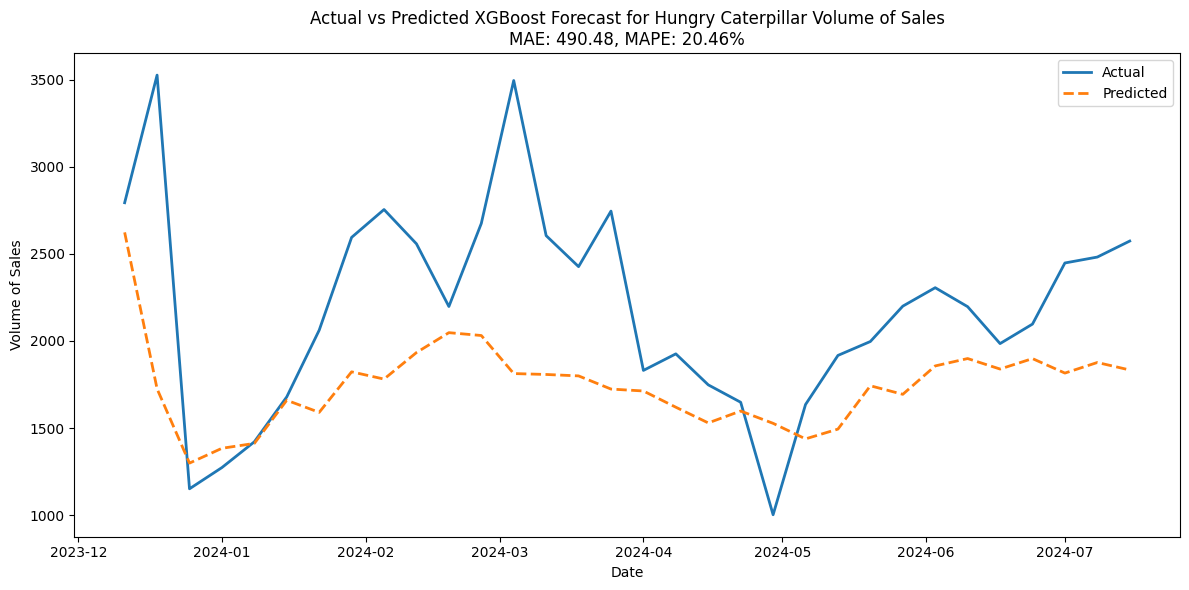

In [ ]:
# Compute MAE and MAPE
mae_hc = mean_absolute_error(y_test_hc, y_pred_hc)
mape_hc = mean_absolute_percentage_error(y_test_hc, y_pred_hc)

# Plot actual v prediction
x_axis_hc = y_test_hc.index.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(x_axis_hc, y_test_hc.values, label="Actual", linewidth=2)
plt.plot(x_axis_hc, y_pred_hc.values, label="Predicted", linestyle="--", linewidth=2)
plt.xlabel("Date")
plt.ylabel("Volume of Sales")
plt.title(
    "Actual vs Predicted XGBoost Forecast for Hungry Caterpillar Volume of Sales\n"
    f"MAE: {mae_hc:.2f}, MAPE: {mape_hc:.2%}"
)
plt.legend()
plt.tight_layout()

Similar to the Alchemist dataset, the XGBoost model performs well on this data. The MAE of 490.48 is lower than the mean of 140.37, with a MAPE of 20.6%. The model captures some of the seasonality towards the end of the year reflected in the original dataset but misses the sharper fluctuations in the rises and falls. Overall, the forecast is stable and tends to smooth out the peaks and troughs, producing a central estimate.

In [ ]:
The_Very_Hungry_Caterpillar_data.describe()

Interval       Volume         Value         ASP         RRP  \
count     656.000000   629.000000    656.000000  629.000000  656.000000   
mean   193487.513720  1405.378378   6672.300152    5.084824    7.661143   
std     40119.746567   667.728510   3329.918042    0.545746    1.588479   
min         0.000000   213.000000      0.000000    3.713600    0.000000   
25%    201432.750000   788.000000   4027.742500    4.640000    7.990000   
50%    201739.500000  1356.000000   6438.065000    5.002500    7.990000   
75%    202121.250000  1796.000000   8743.680000    5.559700    7.990000   
max    202429.000000  3905.000000  19096.600000    6.407400    7.990000   

            Revenue  Imputed_Volume_linear  Imputed_Volume_spline_2  \
count  6.290000e+02             656.000000               656.000000   
mean   1.178301e+07            1417.452744              1392.938678   
std    1.075118e+07             661.478048               682.902127   
min    2.583115e+05             213.000000                 0.000000   
25%    3.338835e+06             841.250000               763.000000   
50%    8.907174e+06            1372.500000              1354.500000   
75%    1.566064e+07            1804.250000              1803.500000   
max    7.457222e+07            3905.000000              3905.000000   

       Imputed_Volume_spline_3  Imputed_Revenue_linear  \
count               656.000000            6.560000e+02   
mean               1393.994650            1.129804e+07   
std                 681.489076            1.078474e+07   
min                   0.000000            0.000000e+00   
25%                 766.000000            2.918098e+06   
50%                1354.000000            8.366613e+06   
75%                1803.500000            1.544505e+07   
max                3905.000000            7.457222e+07   

       Imputed_Revenue_spline_2  Imputed_Revenue_spline_3    stl_trend  \
count              6.560000e+02              6.560000e+02   656.000000   
mean               1.129804e+07              1.129804e+07  1412.224425   
std                1.078474e+07              1.078474e+07   472.339598   
min                0.000000e+00              0.000000e+00   685.051926   
25%                2.918098e+06              2.918098e+06  1028.334831   
50%                8.366613e+06              8.366613e+06  1491.641482   
75%                1.544505e+07              1.544505e+07  1714.997953   
max                7.457222e+07              7.457222e+07  2391.339875   

       stl_seasonal    stl_resid  
count    656.000000   656.000000  
mean      -2.848885     8.077204  
std      384.102391   255.826149  
min    -1228.961998 -1530.793405  
25%     -151.230175   -79.587627  
50%      -56.870257    -2.971966  
75%       32.323677    77.328392  
max     1955.848773  1189.535033

### LSTM Modelling:

LSTM Modelling Process:
- the training data is weekly data over 10 years that excludes the last 32 weeks which it will be forecasting
- due to a strain of time, a window_length of 52 was utilised to try to capture seasonality
- Recursive prediction strategy employed predicts one step foward, this was selected as the ACF and PACF showed that only one lag was significant in determining current volume, the ACF and PACF spikes at week 52 were included, as 52 was the window lenght employed
- The model was trained on both alchemist and Hungry caterpillar Datasets and the used to forecast the final 32 weeks of each dataset.
- Use Volume of Sales as the only input into the model, (should have included end date as well made an error)

In [ ]:
# Prepare the Data for LSTM Model
def prepare_data(data, lookback=52*10, forecast=32):
  data = data.copy()
  data.index = pd.to_datetime(data.index)
  data = data[['Imputed_Volume_linear']]

  # Split the Data (Only 5 years of data before the forecast horizon will be used in the training data)
  train_data = data.iloc[-lookback-forecast : -forecast]
  test_data = data.iloc[-forecast:]

  #Normalize
  scaler = MinMaxScaler()
  scaler.fit(train_data)

  train_scaled = scaler.transform(train_data)
  test_scaled = scaler.transform(test_data)

  return train_scaled, test_scaled, scaler, test_data

In [ ]:
# Create sequences
def create_sequences(train_scaled, window_size=52):
  input_sequences = []
  output_sequences = []

  for i in range(len(train_scaled) - window_size):
        input_sequences.append(train_scaled[i:i+window_size])
        output_sequences.append(train_scaled[i+window_size])

  input_sequences = np.array(input_sequences)
  output_sequences = np.array(output_sequences)

  input_sequences = input_sequences.reshape((input_sequences.shape[0], input_sequences.shape[1], 1))
  input_shape = (input_sequences.shape[1], input_sequences.shape[2])

  return input_sequences, output_sequences,input_shape

In [ ]:
def tuned_model(hp, input_shape):
    model = Sequential()

    # Tune Units
    model.add(LSTM(hp.Int('units_0',min_value=16,max_value=128,step=32),input_shape=input_shape, return_sequences=True))
    model.add(LSTM(hp.Int('units_1',min_value=16,max_value=18,step=32)))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0.1,max_value=0.3,step=0.1)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
    return model

In [ ]:
def predict_future(best_model, train_scaled, forecast=32, window_size=52, scaler=None):
  input_seq = train_scaled[-window_size:].reshape(1, window_size, 1)
  predictions_scaled=[]

  for _ in range(forecast):
    pred_scaled = best_model.predict(input_seq)[0,0]
    predictions_scaled.append(pred_scaled)

    #Append Predicition and slide window by 1
    input_seq = np.append(input_seq[:,1:,:], [[[pred_scaled]]], axis=1)

  predictions_scaled = np.array(predictions_scaled).reshape(-1, 1)

  #Inverse Scale Predictions to original values
  predictions = scaler.inverse_transform(predictions_scaled)

  return predictions

####  LSTM Modelling for Alchemist Dataset

In [ ]:
# Prepare The Alchemist Data and create Sequences
data = The_Alchemist_data
train_scaled_al, test_scaled_al, scaler_al, test_data_al = prepare_data(The_Alchemist_data)
input_sequences_al, output_sequences_al,input_shape_al = create_sequences(train_scaled_al)

In [ ]:
#Hyperparameter tune for the Alchemist Data set
tuner = RandomSearch(
    lambda hp: tuned_model(hp, input_shape=input_shape_al),
    objective='mse',   # minimize mean squared error on validation data
    max_trials=6,      # 3 hyperparameter combinations tried to save time
    executions_per_trial=1,
    project_name='The Alchemist_3'
)

tuner.search(x=input_sequences_al,
             y=output_sequences_al,
             epochs=20,
             batch_size=32,
             validation_split=0.2)

Trial 6 Complete [00h 00m 08s]
mse: 0.009845077060163021

Best mse So Far: 0.00941250380128622
Total elapsed time: 00h 00m 48s


In [ ]:
# Best Hyperparameters for the Alchemist model
best_hyperparameters_al = tuner.get_best_hyperparameters()[0]
print(best_hyperparameters_al.values)

{'units_0': 112, 'units_1': 16, 'Dropout_rate': 0.1}


In [ ]:
from tensorflow.keras.models import load_model
# Best Model for the Alchemist Model
best_model_al = tuner.get_best_models()[0]

best_model_al.save('/content/drive/MyDrive/best_model_al.h5')

In [ ]:
# Load the best model_al
best_model_al = load_model('/content/drive/MyDrive/best_model_al.h5')

In [ ]:
# Use Best Model to predict the 32 weeks forecast period
best_lstm_model_al_predictions = predict_future(best_model_al, train_scaled_al, forecast=32, window_size=52, scaler=scaler_al)

1/1 [==============================] - 0s 14ms/step


In [ ]:
# Calculate Mae and Mape for the Best Alchemist Lstm Model
mae_al_lstm = mean_absolute_error(test_data_al,best_lstm_model_al_predictions)
mape_al_lstm = mean_absolute_percentage_error(test_data_al, best_lstm_model_al_predictions)

print("Mean Absolute Error (MAE):", mae_al_lstm)
print("Mean Absolute Percentage Error (MAPE):", mape_al_lstm)

Mean Absolute Error (MAE): 188.53790664672852
Mean Absolute Percentage Error (MAPE): 0.2678029374039524


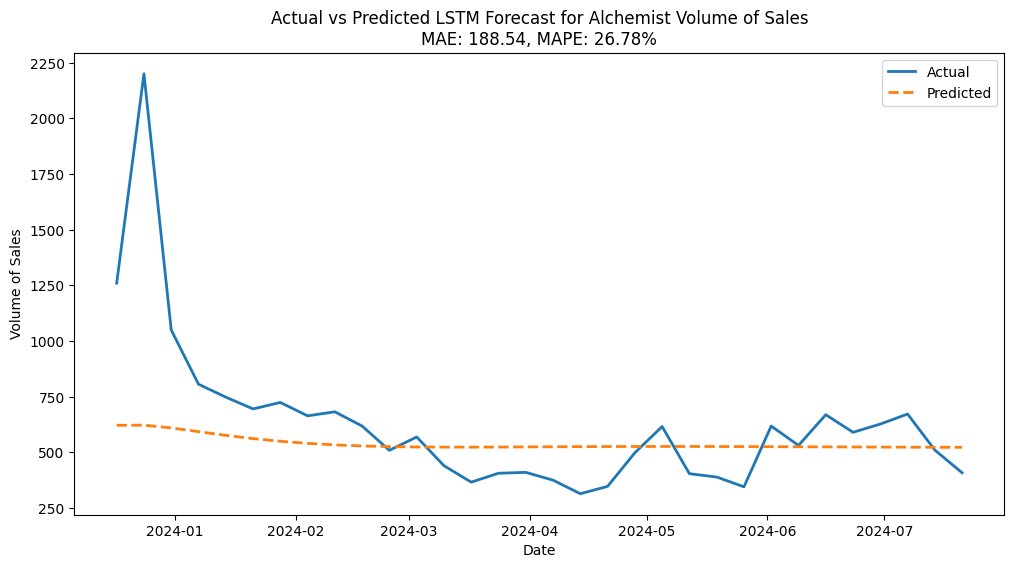

In [ ]:
# Plot the Original Data Along with the Predictions
x_axis_al_lstm = test_data_al.index

plt.figure(figsize=(12,6))
plt.plot(x_axis_al_lstm, test_data_al, label='Actual', linewidth=2)
plt.plot(x_axis_al_lstm, best_lstm_model_al_predictions, label='Predicted', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Volume of Sales')
plt.title(
    "Actual vs Predicted LSTM Forecast for Alchemist Volume of Sales\n"
    f"MAE: {mae_al_lstm:.2f}, MAPE: {mape_al_lstm:.2%}"
)
plt.legend()

The LSTM Model has not performed too well on the Alchemist dataset, The MAE of 190 means that, on average, the model’s predictions are off by 190 units. Given a typical sales volume of 550. The primary issue is the peak seasonality at the new year which is where the greatest deviation in forecasting the volume in sales occurs.he sharp rises, characterise an increase in volume of sales of the book at the New year, the model failed to capture this seasonality, though 10 years of historical data was passed through. A reason for this is is likely due to the recursive prediction strategy employed: the model predicts one step forward, then uses that prediction as part of the input for the next. This approach accumulates errors.

 The forecasting after the newyear does better and the model forecast a stable midpoint

In [ ]:
The_Alchemist_data.describe()

Interval       Volume         Value         ASP         RRP  \
count     656.000000   629.000000    656.000000  629.000000  656.000000   
mean   193487.513720   550.724960   4245.089375    7.973875    9.578826   
std     40119.746567   204.004978   2000.153549    0.752554    1.986095   
min         0.000000   187.000000      0.000000    6.242800    0.000000   
25%    201432.750000   428.000000   3163.707500    7.332900    9.990000   
50%    201739.500000   513.000000   4067.505000    8.027500    9.990000   
75%    202121.250000   613.000000   4964.855000    8.533000    9.990000   
max    202429.000000  2201.000000  19766.670000    9.766100    9.990000   

            Revenue  Imputed_Volume_linear  Imputed_Volume_spline_2  \
count  6.290000e+02             656.000000               656.000000   
mean   2.801888e+06             553.003811               549.989629   
std    3.152988e+06             200.416168               214.031943   
min    3.279138e+05             187.000000                 0.000000   
25%    1.390128e+06             430.750000               425.000000   
50%    2.115386e+06             518.000000               512.500000   
75%    3.033916e+06             615.250000               616.000000   
max    4.350644e+07            2201.000000              2201.000000   

       Imputed_Volume_spline_3  Imputed_Revenue_linear  \
count               656.000000            6.560000e+02   
mean                549.717878            2.686566e+06   
std                 217.256514            3.137169e+06   
min                   0.000000            0.000000e+00   
25%                 424.000000            1.318384e+06   
50%                 512.000000            2.039370e+06   
75%                 616.000000            2.989681e+06   
max                2201.000000            4.350644e+07   

       Imputed_Revenue_spline_2  Imputed_Revenue_spline_3   stl_trend  \
count              6.560000e+02              6.560000e+02  656.000000   
mean               2.686566e+06              2.686566e+06  550.502732   
std                3.137169e+06              3.137169e+06   77.686125   
min                0.000000e+00              0.000000e+00  424.773307   
25%                1.318384e+06              1.318384e+06  474.506918   
50%                2.039370e+06              2.039370e+06  563.428022   
75%                2.989681e+06              2.989681e+06  587.760031   
max                4.350644e+07              4.350644e+07  681.408493   

       stl_seasonal   stl_resid  
count    656.000000  656.000000  
mean      -2.575682    5.076762  
std      164.497569   82.216352  
min     -289.018803 -426.158809  
25%      -70.419755  -27.936665  
50%      -38.323481   -0.400881  
75%        4.573430   31.769815  
max     1521.157189  452.162767

#### LSTM Modelling for The Very Hungry Caterpillar Dataset

In [ ]:
# Train the model on the Hungry Caterpillar Dataset
data = The_Very_Hungry_Caterpillar_data
train_scaled_hc, test_scaled_hc, scaler_hc, test_data_hc = prepare_data(The_Very_Hungry_Caterpillar_data)
input_sequences_hc, output_sequences_hc,input_shape_hc = create_sequences(train_scaled_hc)

In [ ]:
#Hyperparameter tune for the Alchemist Data set
tuner_hc = RandomSearch(
    lambda hp: tuned_model(hp, input_shape=input_shape_hc),
    objective='mse',
    max_trials=6,      # 3 hyperparameter combinations (tried to save time)
    executions_per_trial=1,
    project_name='hungry_caterpillar_2'
)

tuner_hc.search(x=input_sequences_hc,
             y=output_sequences_hc,
             epochs=20,
             batch_size=32,
             validation_split=0.2)

Trial 6 Complete [00h 00m 07s]
mse: 0.018117308616638184

Best mse So Far: 0.01549098826944828
Total elapsed time: 00h 00m 48s


In [ ]:
# Best Hyperparameters for the Alchemist model
best_hyperparameters_hc = tuner_hc.get_best_hyperparameters()[0]
print(best_hyperparameters_hc.values)

{'units_0': 112, 'units_1': 16, 'Dropout_rate': 0.1}


In [ ]:
from tensorflow.keras.models import load_model
# Best Model for the Alchemist Model
best_model_hc = tuner_hc.get_best_models()[0]

best_model_hc.save('/content/drive/MyDrive/best_model_hc.h5')

In [ ]:
# Load the best model_al
best_model_hc = load_model('/content/drive/MyDrive/best_model_hc.h5')

In [ ]:
# Use Best Model to predict the 32 weeks forecast period
best_model_hc_predictions = predict_future(best_model_hc, train_scaled_hc, forecast=32, window_size=52, scaler=scaler_hc)

1/1 [==============================] - 0s 14ms/step


In [ ]:
# Calculate Mae and Mape for the Best Alchemist Lstm Model
mae_hc_lstm = mean_absolute_error(test_data_hc, best_model_hc_predictions)
mape_hc_lstm = mean_absolute_percentage_error(test_data_hc, best_model_hc_predictions)

print("Mean Absolute Error (MAE):", mae_hc_lstm)
print("Mean Absolute Percentage Error (MAPE):", mape_hc_lstm)

Mean Absolute Error (MAE): 645.9836921691895
Mean Absolute Percentage Error (MAPE): 0.2860827753472509


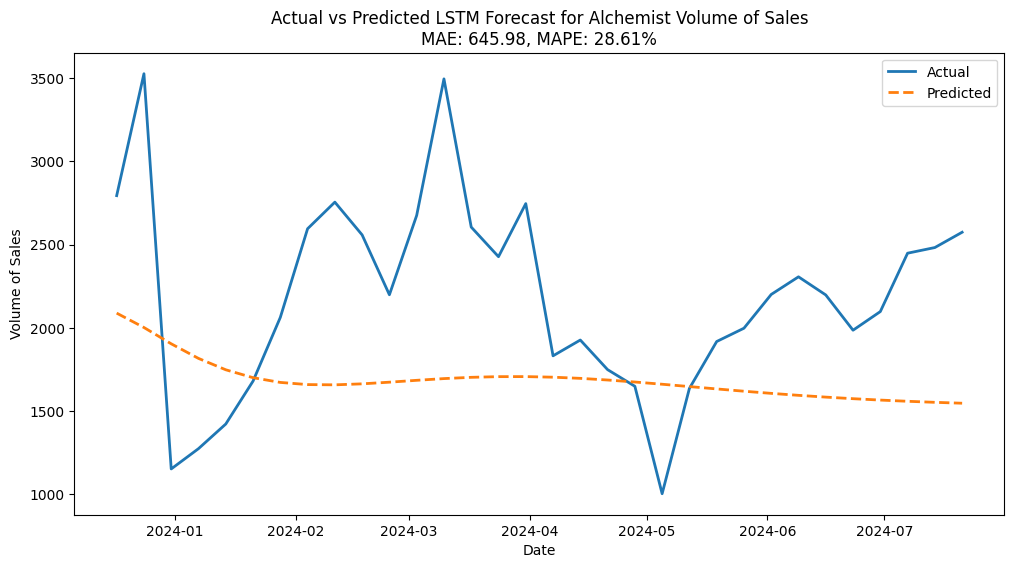

In [ ]:
# Plot the Original Data Along with the Predictions
x_axis_hc_lstm = test_data_hc.index

plt.figure(figsize=(12,6))
plt.plot(x_axis_hc_lstm, test_data_hc, label='Actual', linewidth=2)
plt.plot(x_axis_hc_lstm, best_model_hc_predictions, label='Predicted', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Volume of Sales')
plt.title(
    "Actual vs Predicted LSTM Forecast for Alchemist Volume of Sales\n"
    f"MAE: {mae_hc_lstm:.2f}, MAPE: {mape_hc_lstm:.2%}"
)
plt.legend()

Similar to the LSTM model applied to the Alchemist dataset, the model failed to capture the seasonal spike in sales that typically occurs in late December and early January for The Hungry Caterpillar. The model appears to approximate a central trend — generating forecasts that fall between the highs and lows. While it doesn't reflect short-term fluctuations or seasonal peaks, it identifies a relatively stable midpoint around which the actual sales vary.  The model achieved a mean absolute error (MAE) of 645.98, compared to an actual weekly average of 1,405. Given the magnitude of the rises and falls, the model has predicitive use as it captures the broader level around which sales fluctuate

In [ ]:
The_Very_Hungry_Caterpillar_data.describe()

Interval       Volume         Value         ASP         RRP  \
count     656.000000   629.000000    656.000000  629.000000  656.000000   
mean   193487.513720  1405.378378   6672.300152    5.084824    7.661143   
std     40119.746567   667.728510   3329.918042    0.545746    1.588479   
min         0.000000   213.000000      0.000000    3.713600    0.000000   
25%    201432.750000   788.000000   4027.742500    4.640000    7.990000   
50%    201739.500000  1356.000000   6438.065000    5.002500    7.990000   
75%    202121.250000  1796.000000   8743.680000    5.559700    7.990000   
max    202429.000000  3905.000000  19096.600000    6.407400    7.990000   

            Revenue  Imputed_Volume_linear  Imputed_Volume_spline_2  \
count  6.290000e+02             656.000000               656.000000   
mean   1.178301e+07            1417.452744              1392.938678   
std    1.075118e+07             661.478048               682.902127   
min    2.583115e+05             213.000000                 0.000000   
25%    3.338835e+06             841.250000               763.000000   
50%    8.907174e+06            1372.500000              1354.500000   
75%    1.566064e+07            1804.250000              1803.500000   
max    7.457222e+07            3905.000000              3905.000000   

       Imputed_Volume_spline_3  Imputed_Revenue_linear  \
count               656.000000            6.560000e+02   
mean               1393.994650            1.129804e+07   
std                 681.489076            1.078474e+07   
min                   0.000000            0.000000e+00   
25%                 766.000000            2.918098e+06   
50%                1354.000000            8.366613e+06   
75%                1803.500000            1.544505e+07   
max                3905.000000            7.457222e+07   

       Imputed_Revenue_spline_2  Imputed_Revenue_spline_3    stl_trend  \
count              6.560000e+02              6.560000e+02   656.000000   
mean               1.129804e+07              1.129804e+07  1412.224425   
std                1.078474e+07              1.078474e+07   472.339598   
min                0.000000e+00              0.000000e+00   685.051926   
25%                2.918098e+06              2.918098e+06  1028.334831   
50%                8.366613e+06              8.366613e+06  1491.641482   
75%                1.544505e+07              1.544505e+07  1714.997953   
max                7.457222e+07              7.457222e+07  2391.339875   

       stl_seasonal    stl_resid  
count    656.000000   656.000000  
mean      -2.848885     8.077204  
std      384.102391   255.826149  
min    -1228.961998 -1530.793405  
25%     -151.230175   -79.587627  
50%      -56.870257    -2.971966  
75%       32.323677    77.328392  
max     1955.848773  1189.535033

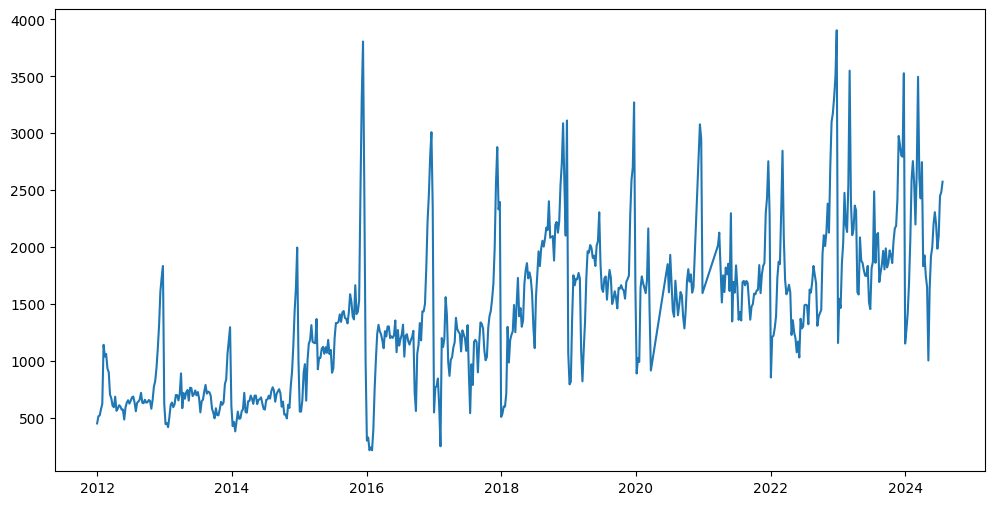

In [ ]:
#plot hungry caterpillar imputed volume
plt.figure(figsize=(12, 6))
plt.plot(The_Very_Hungry_Caterpillar_data['Imputed_Volume_linear'], label='Imputed Volume')

## Hybrid Modelling on The Alchemist Dataset

### Apply Hybrid model of SARIMA and LSTM in Sequential Combination

In [ ]:
import multiprocessing

In [ ]:
# Retrain SARIMA Model for 10 years to match the LSTM training data lookback period
forecast_period = 32
lookback_period = 52*10
n_jobs = max(1, multiprocessing.cpu_count() - 1)

ts_Alchemist_train = ts_Alchemist.iloc[:-forecast_period]
ts_Alchemist_test = ts_Alchemist.iloc[-forecast_period:]
ts_Alchemist_train_subset = ts_Alchemist.iloc[-forecast_period-lookback_period:-forecast_period]

#Fit Auto Arima model to Alchemist training data with the below specified bound:
model_alchemist_week_1 = auto_arima(y=ts_Alchemist_train_subset, m=52, start_p=0, max_p=2,start_q=0, max_q=2,seasonal=True,d=0, max_d=1, start_P=0, max_P=2, start_Q=0, max_Q=1,D=None, max_D=1, max_order=8,information_criterion='aic', test='kpss', seasonal_test='ocsb', maxiter=20, step_wise=True, n_jobs=n_jobs, suppress_warnings=True, error_action='ignore' )

#Display
print(model_alchemist_week_1.summary())

#save
joblib.dump(model_alchemist_week_1, '/content/drive/MyDrive/model_alchemist_week_1.pkl')

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  520
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 52)   Log Likelihood               -3148.719
Date:                              Wed, 04 Jun 2025   AIC                           6307.438
Time:                                      13:47:58   BIC                           6328.707
Sample:                                  12-29-2013   HQIC                          6315.770
                                       - 12-10-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    150.0471     15.116      9.926      0.000     120.420     179.675
ar.L1          0.57

['/content/drive/MyDrive/model_alchemist_week_1.pkl']

In [ ]:
print("Length of training subset index:", len(ts_Alchemist_train_subset))

Length of training subset index: 520


In [ ]:
print("Length of residuals:", len(residuals_alchemist_1))

Length of residuals: 520


In [ ]:
#Load Alchemist Model
model_alchemist_week_1 = joblib.load('/content/drive/MyDrive/model_alchemist_week_1.pkl')

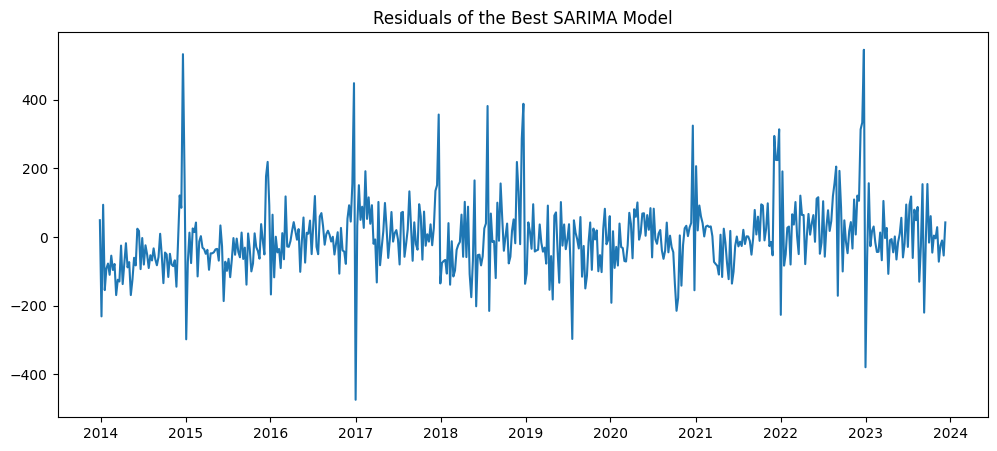

In [ ]:
# Residuals of the best model for the Alchemist
residuals_alchemist_1 = model_alchemist_week_1.resid()

# Plot residuals
plt.figure(figsize=(12, 5))
plt.plot(residuals_alchemist_1)
plt.title('Residuals of the Best SARIMA Model')
plt.show()

In [ ]:
# Convert residuals from SARIMA Model to DataFrame with Dates
residuals_df = pd.DataFrame(residuals_alchemist_1, columns=['residuals'])
residuals_df.index = ts_Alchemist_train_subset.index

In [ ]:
residuals_df.head()

residuals
End Date              
2013-12-29   48.802165
2014-01-05 -231.055213
2014-01-12   93.792077
2014-01-19 -154.526810
2014-01-26  -91.757536

In [ ]:
def prepare_data_for_residuals(data, lookback=52*10, forecast=32):
    data = data.copy()
    data.index = pd.to_datetime(data.index)

    # Split Residual data set
    train_data = data.iloc[-lookback-forecast : -forecast]
    test_data = data.iloc[-forecast:]

    #Normalize
    scaler = MinMaxScaler()
    scaler.fit(train_data)

    train_scaled = scaler.transform(train_data)
    test_scaled = scaler.transform(test_data)

    return train_scaled, test_scaled, scaler, test_data

In [ ]:
# Prepare The Alchemist residuals Data for LSTM
train_scaled_al_res, test_scaled_al_res, scaler_al_res, test_al_residuals = prepare_data_for_residuals(residuals_df)
input_sequences_al_res, output_sequences_al_res,input_shape_al_res = create_sequences(train_scaled_al_res)

In [ ]:
#Hyperparameter tune for the Alchemist residuals Data set
tuner_al_hybrid = RandomSearch(
    lambda hp: tuned_model(hp, input_shape=input_shape_al_res),
    objective='mse',   # minimize mean squared error on validation data
    max_trials=6,      # 3 hyperparameter combinations tried to save time
    executions_per_trial=1,
    project_name='The Alchemist_hybrid_1'
)

tuner_al_hybrid.search(x=input_sequences_al_res,
             y=output_sequences_al_res,
             epochs=20,
             batch_size=32,
             validation_split=0.2)

Trial 6 Complete [00h 00m 08s]
mse: 0.009634437970817089

Best mse So Far: 0.00953406747430563
Total elapsed time: 00h 00m 44s


In [ ]:
# Best Hyperparameters for the Alchemist hybrid model
best_hyperparameters_al_hybrid = tuner_al_hybrid.get_best_hyperparameters()[0]
print(best_hyperparameters_al_hybrid.values)

{'units_0': 16, 'units_1': 16, 'Dropout_rate': 0.1}


In [ ]:
from tensorflow.keras.models import load_model
# Best Model for the Alchemist Model
best_model_al_residual = tuner_al_hybrid.get_best_models()[0]

best_model_al_residual.save('/content/drive/MyDrive/best_model_al_hybrid.h5')

In [ ]:
# Use Best Model to predict the 32 weeks forecast period
forecasted_residuals_al = predict_future(best_model_al_residual, train_scaled_al_res, forecast=32, window_size=52, scaler=scaler_al_res)

1/1 [==============================] - 0s 13ms/step


In [ ]:
# Combine Sarima forecast and LSTM residual Forecast
# Use Sarima_forecast
sarima_forecast_al = model_alchemist_week_1.predict(n_periods=32)
hybrid_forecast_al = sarima_forecast_al + forecasted_residuals_al.flatten()

In [ ]:
# Calculate Mae and Mape for the Best Alchemist Hybrid Model
mae_hybrid_model_al = mean_absolute_error(ts_Alchemist_test,hybrid_forecast_al)
mape_hybrid_model_al = mean_absolute_percentage_error(ts_Alchemist_test, hybrid_forecast_al)

print("Mean Absolute Error (MAE):",mae_hybrid_model_al)
print("Mean Absolute Percentage Error (MAPE):", mape_hybrid_model_al)

Mean Absolute Error (MAE): 141.29344827789262
Mean Absolute Percentage Error (MAPE): 0.25305578534713213


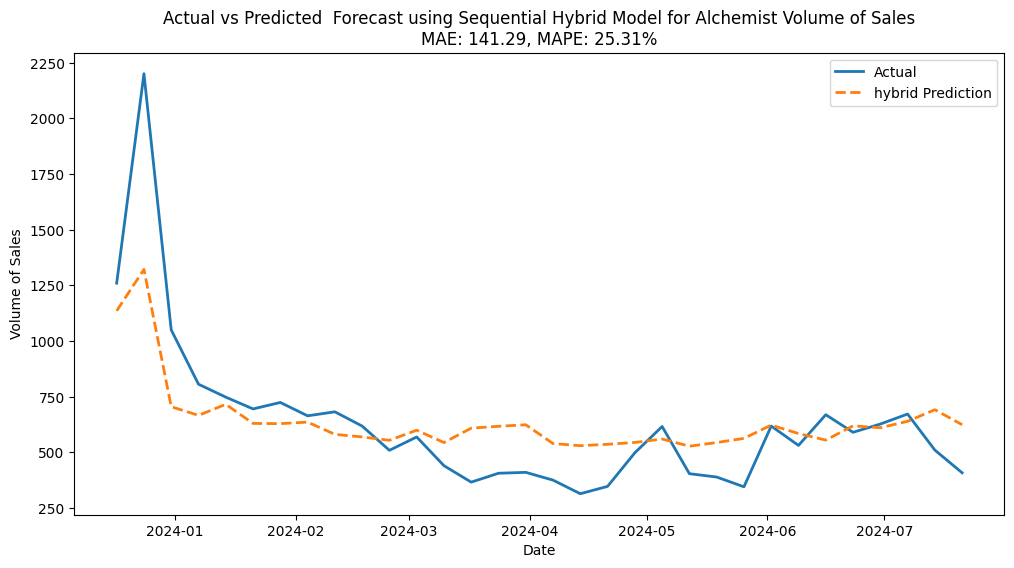

In [ ]:
# Plot the Original Data Along with the Predictions
x_axis_al_hybrid = ts_Alchemist_test.index

plt.figure(figsize=(12,6))
plt.plot(x_axis_al_hybrid,ts_Alchemist_test, label='Actual', linewidth=2)
plt.plot(x_axis_al_hybrid, hybrid_forecast_al, label='hybrid Prediction', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Volume of Sales')
plt.title(
    "Actual vs Predicted  Forecast using Sequential Hybrid Model for Alchemist Volume of Sales\n"
    f"MAE: {mae_hybrid_model_al:.2f}, MAPE: {mape_hybrid_model_al:.2%}"
)
plt.legend()

### Apply Hybrid Model of SARIMA and LSTM IN Parallel Combination

In [ ]:
# We use the SARIMA forecast for the Alchemist for this:
sarima_forecast_al_1 = np.array(sarima_forecast_al).flatten()

In [ ]:
# For the LSTM, we utilise the model in our Machine learning section
lstm_forecast_al = np.array(best_lstm_model_al_predictions).flatten()

In [ ]:
# Hybrid Parallel Forecast
hybrid_parallel_forecast = 0.5 * sarima_forecast_al_1 + 0.5 * lstm_forecast_al

In [ ]:
# Calculate MAE and MAPE of the Hybrid Parallel combination of Sarima and Lstm
mae_hybrid_parallel_al = mean_absolute_error(ts_Alchemist_test, hybrid_parallel_forecast)
mape_hybrid_parallel_al = mean_absolute_percentage_error(ts_Alchemist_test, hybrid_parallel_forecast)

print("Mean Absolute Error (MAE):", mae_hybrid_parallel_al)
print("Mean Absolute Percentage Error (MAPE):", mape_hybrid_parallel_al)

Mean Absolute Error (MAE): 163.1213574042843
Mean Absolute Percentage Error (MAPE): 0.2591017878617309


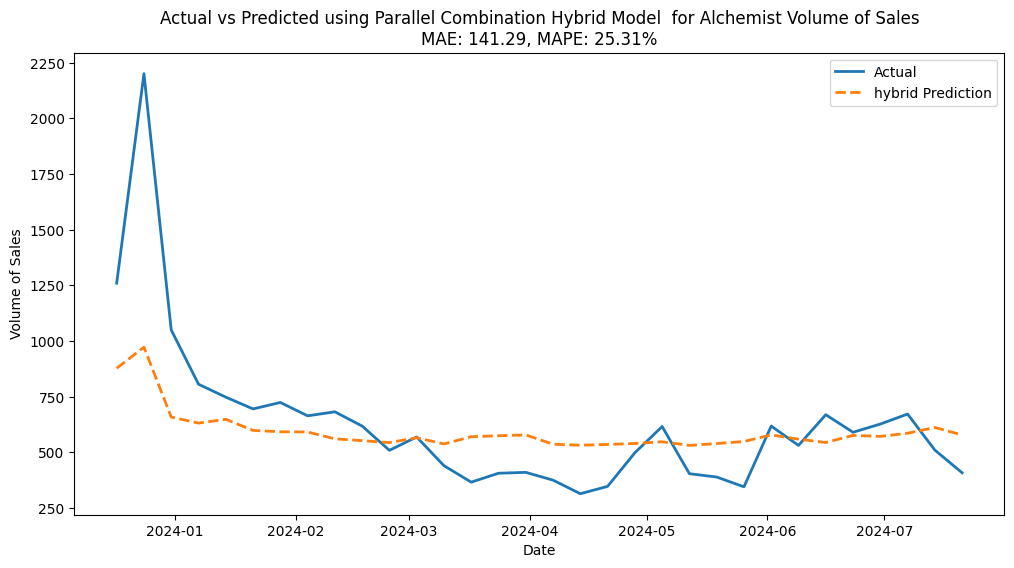

In [ ]:
# Plot
x_axis_al_hybrid_parallel = ts_Alchemist_test.index

plt.figure(figsize=(12,6))
plt.plot(x_axis_al_hybrid_parallel, ts_Alchemist_test, label='Actual', linewidth=2)
plt.plot(x_axis_al_hybrid_parallel, hybrid_parallel_forecast, label='hybrid Prediction', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Volume of Sales')
plt.title(
    "Actual vs Predicted using Parallel Combination Hybrid Model  for Alchemist Volume of Sales\n"
    f"MAE: {mae_hybrid_model_al:.2f}, MAPE: {mape_hybrid_model_al:.2%}"
)
plt.legend()

Modify the Parallell combination,

- I will first modify the sarima weighting as the seasonality at the start of the year was not captured well. I will give SARIMAX compononet 0.8 and the LSTM component 0.2

In [ ]:
# Hybrid Parallel Forecast 2 (using 0.8 Sarima weighting and 0.2 lstm weighting)
hybrid_parallel_forecast_2 = 0.8 * sarima_forecast_al_1 + 0.2 * lstm_forecast_al

In [ ]:
# Calculate MAE and MAPE of the Hybrid Parallel combination of Sarima and Lstm
mae_hybrid_parallel_2__al = mean_absolute_error(ts_Alchemist_test, hybrid_parallel_forecast_2)
mape_hybrid_parallel_2_al = mean_absolute_percentage_error(ts_Alchemist_test,hybrid_parallel_forecast_2)

print("Mean Absolute Error (MAE):", mae_hybrid_parallel_2__al)
print("Mean Absolute Percentage Error (MAPE):", mape_hybrid_parallel_2_al)

Mean Absolute Error (MAE): 150.52991495493876
Mean Absolute Percentage Error (MAPE): 0.2585145608554892


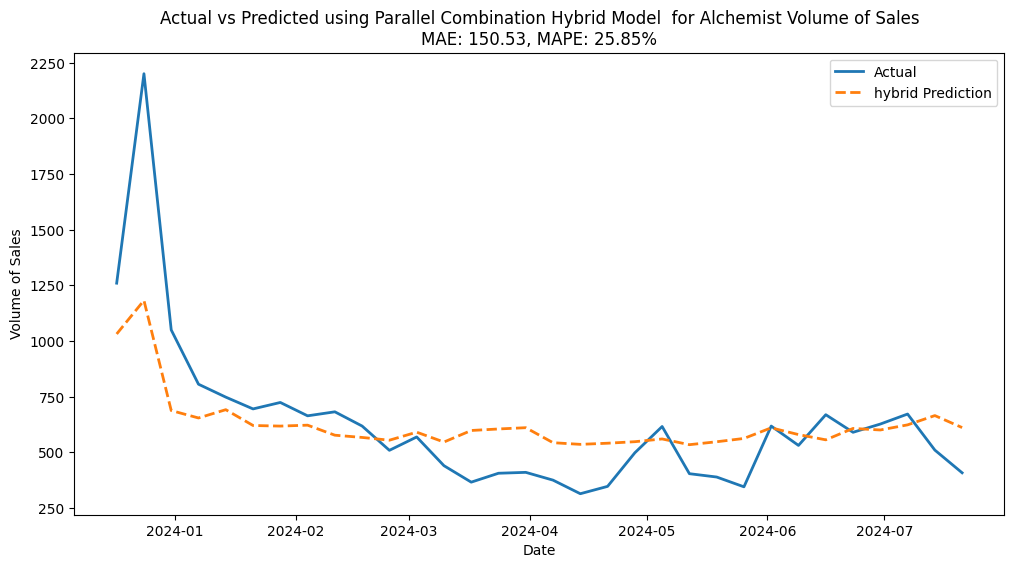

In [ ]:
# Plot the prediction for Parllel hybrid forecast 2
x_axis_al_hybrid_parallel = ts_Alchemist_test.index

plt.figure(figsize=(12,6))
plt.plot(x_axis_al_hybrid_parallel, ts_Alchemist_test, label='Actual', linewidth=2)
plt.plot(x_axis_al_hybrid_parallel, hybrid_parallel_forecast_2, label='hybrid Prediction', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Volume of Sales')
plt.title(
    "Actual vs Predicted using Parallel Combination Hybrid Model  for Alchemist Volume of Sales\n"
    f"MAE: {mae_hybrid_parallel_2__al:.2f}, MAPE: {mape_hybrid_parallel_2_al:.2%}"
)
plt.legend()

Increasing the weighting of the seasonal component improved the performance reduceing MAE and MAPE, the sharp peak at the start of the year, isnot replicated well by the model, though it recognises the seasonality and peak

## Monthly prediction

In [ ]:
# Review The Alchemist Weekly Dataset
The_Alchemist_data.head()

ISBN           Title         Author  Interval  Volume  \
End Date                                                                     
2012-01-01  9780722532935  Alchemist, The  Coelho, Paulo    201152   499.0   
2012-01-08  9780722532935  Alchemist, The  Coelho, Paulo    201201   518.0   
2012-01-15  9780722532935  Alchemist, The  Coelho, Paulo    201202   533.0   
2012-01-22  9780722532935  Alchemist, The  Coelho, Paulo    201203   475.0   
2012-01-29  9780722532935  Alchemist, The  Coelho, Paulo    201204   514.0   

              Value     ASP   RRP    Binding   Imprint  ...  \
End Date                                                ...   
2012-01-01  3507.91  7.0299  9.99  Paperback  Thorsons  ...   
2012-01-08  3601.76  6.9532  9.99  Paperback  Thorsons  ...   
2012-01-15  3610.12  6.7732  9.99  Paperback  Thorsons  ...   
2012-01-22  3105.62  6.5381  9.99  Paperback  Thorsons  ...   
2012-01-29  3431.29  6.6757  9.99  Paperback  Thorsons  ...   

           Country of Publication Imputed_Volume_linear  \
End Date                                                  
2012-01-01         United Kingdom                 499.0   
2012-01-08         United Kingdom                 518.0   
2012-01-15         United Kingdom                 533.0   
2012-01-22         United Kingdom                 475.0   
2012-01-29         United Kingdom                 514.0   

            Imputed_Volume_spline_2 Imputed_Volume_spline_3  \
End Date                                                      
2012-01-01                    499.0                   499.0   
2012-01-08                    518.0                   518.0   
2012-01-15                    533.0                   533.0   
2012-01-22                    475.0                   475.0   
2012-01-29                    514.0                   514.0   

            Imputed_Revenue_linear  Imputed_Revenue_spline_2  \
End Date                                                       
2012-01-01              1750447.09                1750447.09   
2012-01-08              1865711.68                1865711.68   
2012-01-15              1924193.96                1924193.96   
2012-01-22              1475169.50                1475169.50   
2012-01-29              1763683.06                1763683.06   

            Imputed_Revenue_spline_3   stl_trend  stl_seasonal  stl_resid  
End Date                                                                   
2012-01-01                1750447.09  582.616630    -99.213040  15.596410  
2012-01-08                1865711.68  580.178889    -53.883151  -8.295739  
2012-01-15                1924193.96  577.744838    -51.599391   6.854553  
2012-01-22                1475169.50  575.314643    -87.785452 -12.529190  
2012-01-29                1763683.06  572.888476    -56.251485  -2.636991  

[5 rows x 23 columns]

In [ ]:
The_Alchemist_data_monthly = The_Alchemist_data[['ISBN','Imputed_Volume_linear']]

The_Alchemist_data_monthly.head()

ISBN  Imputed_Volume_linear
End Date                                        
2012-01-01  9780722532935                  499.0
2012-01-08  9780722532935                  518.0
2012-01-15  9780722532935                  533.0
2012-01-22  9780722532935                  475.0
2012-01-29  9780722532935                  514.0

In [ ]:
# Resample the Alchemist Weekly Dataset to Monthly and aggregate by sum
The_Alchemist_monthly = The_Alchemist_data_monthly.resample('M').sum()

The_Alchemist_monthly.head()

ISBN  \
End Date                                                        
2012-01-31  9780722532935978072253293597807225329359780722...   
2012-02-29  9780722532935978072253293597807225329359780722...   
2012-03-31  9780722532935978072253293597807225329359780722...   
2012-04-30  9780722532935978072253293597807225329359780722...   
2012-05-31  9780722532935978072253293597807225329359780722...   

            Imputed_Volume_linear  
End Date                           
2012-01-31                 2539.0  
2012-02-29                 1866.0  
2012-03-31                 2813.0  
2012-04-30                 3971.0  
2012-05-31                 2385.0

In [ ]:
#Review the Hungry Caterpillar
The_Very_Hungry_Caterpillar_data.head()

ISBN                         Title       Author  \
End Date                                                               
2012-01-01  9780241003008  Very Hungry Caterpillar, The  Carle, Eric   
2012-01-08  9780241003008  Very Hungry Caterpillar, The  Carle, Eric   
2012-01-15  9780241003008  Very Hungry Caterpillar, The  Carle, Eric   
2012-01-22  9780241003008  Very Hungry Caterpillar, The  Carle, Eric   
2012-01-29  9780241003008  Very Hungry Caterpillar, The  Carle, Eric   

            Interval  Volume    Value     ASP   RRP   Binding       Imprint  \
End Date                                                                      
2012-01-01    201152   449.0  2317.98  5.1625  7.99  Hardback  Puffin Books   
2012-01-08    201201   512.0  2522.13  4.9260  7.99  Hardback  Puffin Books   
2012-01-15    201202   519.0  2473.31  4.7655  7.99  Hardback  Puffin Books   
2012-01-22    201203   574.0  2757.83  4.8046  7.99  Hardback  Puffin Books   
2012-01-29    201204   621.0  3072.66  4.9479  7.99  Hardback  Puffin Books   

            ... Country of Publication Imputed_Volume_linear  \
End Date    ...                                                
2012-01-01  ...         United Kingdom                 449.0   
2012-01-08  ...         United Kingdom                 512.0   
2012-01-15  ...         United Kingdom                 519.0   
2012-01-22  ...         United Kingdom                 574.0   
2012-01-29  ...         United Kingdom                 621.0   

            Imputed_Volume_spline_2 Imputed_Volume_spline_3  \
End Date                                                      
2012-01-01                    449.0                   449.0   
2012-01-08                    512.0                   512.0   
2012-01-15                    519.0                   519.0   
2012-01-22                    574.0                   574.0   
2012-01-29                    621.0                   621.0   

            Imputed_Revenue_linear  Imputed_Revenue_spline_2  \
End Date                                                       
2012-01-01              1040773.02                1040773.02   
2012-01-08              1291330.56                1291330.56   
2012-01-15              1283647.89                1283647.89   
2012-01-22              1582994.42                1582994.42   
2012-01-29              1908121.86                1908121.86   

            Imputed_Revenue_spline_3   stl_trend  stl_seasonal  stl_resid  
End Date                                                                   
2012-01-01                1040773.02  705.276496   -256.806971   0.530475  
2012-01-08                1291330.56  705.267365   -172.286234 -20.981131  
2012-01-15                1283647.89  705.267336   -174.409776 -11.857561  
2012-01-22                1582994.42  705.276613   -169.613718  38.337105  
2012-01-29                1908121.86  705.295408   -121.406142  37.110735  

[5 rows x 23 columns]

In [ ]:
The_Very_Hungry_Caterpillar_data_monthly = The_Very_Hungry_Caterpillar_data[['ISBN','Imputed_Volume_linear']]

The_Very_Hungry_Caterpillar_data_monthly.head()

ISBN  Imputed_Volume_linear
End Date                                        
2012-01-01  9780241003008                  449.0
2012-01-08  9780241003008                  512.0
2012-01-15  9780241003008                  519.0
2012-01-22  9780241003008                  574.0
2012-01-29  9780241003008                  621.0

In [ ]:
The_Very_Hungry_Caterpillar_data_monthly = The_Very_Hungry_Caterpillar_data_monthly.resample('M').sum()

The_Very_Hungry_Caterpillar_data_monthly.head()

ISBN  \
End Date                                                        
2012-01-31  9780241003008978024100300897802410030089780241...   
2012-02-29  9780241003008978024100300897802410030089780241...   
2012-03-31  9780241003008978024100300897802410030089780241...   
2012-04-30  9780241003008978024100300897802410030089780241...   
2012-05-31  9780241003008978024100300897802410030089780241...   

            Imputed_Volume_linear  
End Date                           
2012-01-31                 2675.0  
2012-02-29                 4168.0  
2012-03-31                 2874.0  
2012-04-30                 3023.0  
2012-05-31                 2223.0

In [ ]:
# prep book data for Sarima model to input 1 feature
#Alchemist Book:
ts_Alchemist_monthly = The_Alchemist_monthly['Imputed_Volume_linear']

#Very Hungry Caterpillar Book:
ts_Hungry_Caterpillar_monthly = The_Very_Hungry_Caterpillar_data_monthly['Imputed_Volume_linear']

### Train XGBoost

In [ ]:
def tune_xgb_forecaster(data, target_col='Imputed_Volume_linear', freq='M', forecast_horizon=8):
    """
    Tune XGBoost pipeline hyperparameters using ForecastingGridSearchCV with GPU acceleration.

    Parameters:
        data: DataFrame with target_col and datetime index
        target_col: column to forecast
        freq: frequency string to convert to PeriodIndex
        forecast_horizon: forecast period

    Returns:
        best_forecaster: best fitted pipeline from grid search
        best_params: dict of best hyperparameters found
    """
    data = data.copy()
    data.index = pd.to_datetime(data.index)
    data.index = data.index.to_period(freq)

    #Split the data
    y = data[target_col].copy()
    y_train = y.iloc[:-forecast_horizon]
    y_test = y.iloc[-forecast_horizon:]


    # Define the regressor model (using gpu)
    regressor = XGBRegressor(
        n_estimators=400,
        tree_method='gpu_hist',
        predictor='gpu_predictor',
        booster='gbtree',
        seed=0

    )

    def create_forecaster(window_length):
        reduced_model = make_reduction(regressor, window_length=window_length, strategy="recursive")
        return TransformedTargetForecaster(steps=[
            ("deseasonalize", Deseasonalizer(sp=12, model='additive')),
            ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=1))),
            ("forecast", reduced_model)
        ])

    forecaster = create_forecaster(window_length=4)

    # Define Parameter Grid
    param_grid = {
        'forecast__window_length': [4, 8, 12],
        'forecast__max_depth': [4, 7],
        'forecast__gamma': [0, 1,],
        'forecast__reg_alpha': [0, 20],
    }

    cv = ExpandingWindowSplitter(initial_window=int(len(y_train) * 0.7))

    gscv = ForecastingGridSearchCV(
        forecaster,
        strategy="refit",
        cv=cv,
        param_grid=param_grid,
        scoring=MeanAbsolutePercentageError(symmetric=True)
    )

    gscv.fit(y_train)

    best_forecaster = gscv.best_forecaster_
    best_params = gscv.best_params_

    return y_train, y_test, best_forecaster, best_params

In [ ]:
# Identify the Best Params for the XGBoost for the Alchemist Monthly Data
y_train_al_monthly, y_test_al_monthly, best_forecaster_al_monthly, best_params_al_monthly = tune_xgb_forecaster(The_Alchemist_monthly)
print("Best Parameters found for Alchemist Monthly Dataset:", best_params_al_monthly)

joblib.dump(best_forecaster_al_monthly, '/content/drive/MyDrive/best_forecaster_al_monthly.pkl')

Best Parameters found for Alchemist Monthly Dataset: {'forecast__gamma': 1, 'forecast__max_depth': 4, 'forecast__reg_alpha': 0, 'forecast__window_length': 12}


['/content/drive/MyDrive/best_forecaster_al_monthly.pkl']

In [ ]:
# Save best Forecaster XGBoost model
import joblib
joblib.dump(best_forecaster_al_monthly, '/content/drive/MyDrive/best_forecaster_al_monthly.pkl')

['/content/drive/MyDrive/best_forecaster_al_monthly.pkl']

In [ ]:
# Load the Bestforecaster model
best_forecaster_al_monthly = joblib.load('/content/drive/MyDrive/best_forecaster_al_monthly.pkl')

In [ ]:
# Fit the best forecaster to the training data
best_forecaster_al_monthly.fit(y_train_al_monthly)

# Define forecast horizon
fh = np.arange(1, 9)

# Predict next 8 months
y_pred_al_monthly = best_forecaster_al_monthly.predict(fh=fh)

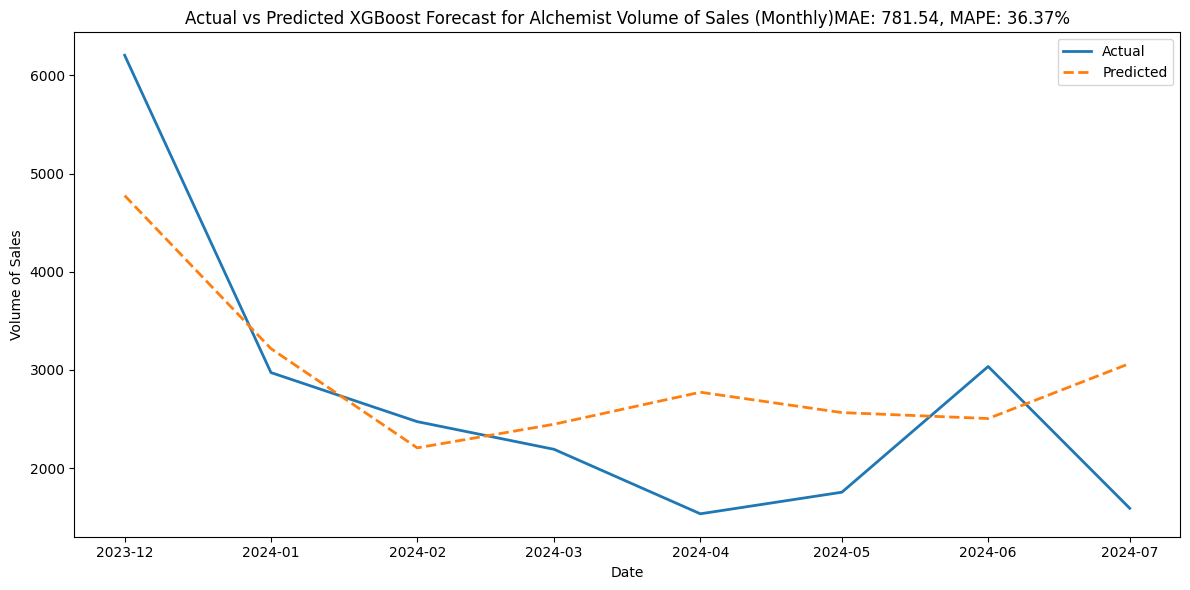

In [ ]:
# Compute MAE and MAPE
mae_al_monthly = mean_absolute_error(y_test_al_monthly, y_pred_al_monthly)
mape_al_monthly = mean_absolute_percentage_error(y_test_al_monthly, y_pred_al_monthly)

# Plot the original data along with the predictions for the Alchemist Monthly Dataset
x_axis_al_monthly = y_test_al_monthly.index.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(x_axis_al_monthly, y_test_al_monthly.values, label="Actual", linewidth=2)
plt.plot(x_axis_al_monthly, y_pred_al_monthly.values, label="Predicted", linestyle="--", linewidth=2)
plt.xlabel("Date")
plt.ylabel("Volume of Sales")
plt.title(
    "Actual vs Predicted XGBoost Forecast for Alchemist Volume of Sales (Monthly)"
    f"MAE: {mae_al_monthly:.2f}, MAPE: {mape_al_monthly:.2%}"
)
plt.legend()
plt.tight_layout()

In [ ]:
# Identify the Best Params for the XGBoost for the Alchemist Monthly Data
y_train_hc_monthly, y_test_hc_monthly, best_forecaster_hc_monthly, best_params_hc_monthly = tune_xgb_forecaster(The_Very_Hungry_Caterpillar_data_monthly)
print("Best Parameters found for Hungry Caterpillar Monthly Dataset:", best_params_hc_monthly)

joblib.dump(best_forecaster_hc_monthly, '/content/drive/MyDrive/best_forecaster_hc_monthly.pkl')

Best Parameters found for Hungry Caterpillar Monthly Dataset: {'forecast__gamma': 1, 'forecast__max_depth': 7, 'forecast__reg_alpha': 20, 'forecast__window_length': 8}


['/content/drive/MyDrive/best_forecaster_hc_monthly.pkl']

In [ ]:
# Load the Bestforecaster model
best_forecaster_hc_monthly = joblib.load('/content/drive/MyDrive/best_forecaster_hc_monthly.pkl')

In [ ]:
# Fit the best forecaster to the training data
best_forecaster_hc_monthly.fit(y_train_hc_monthly)

# Define forecast horizon
fh = np.arange(1, 9)

# Predict next 8 months
y_pred_hc_monthly = best_forecaster_hc_monthly.predict(fh=fh)

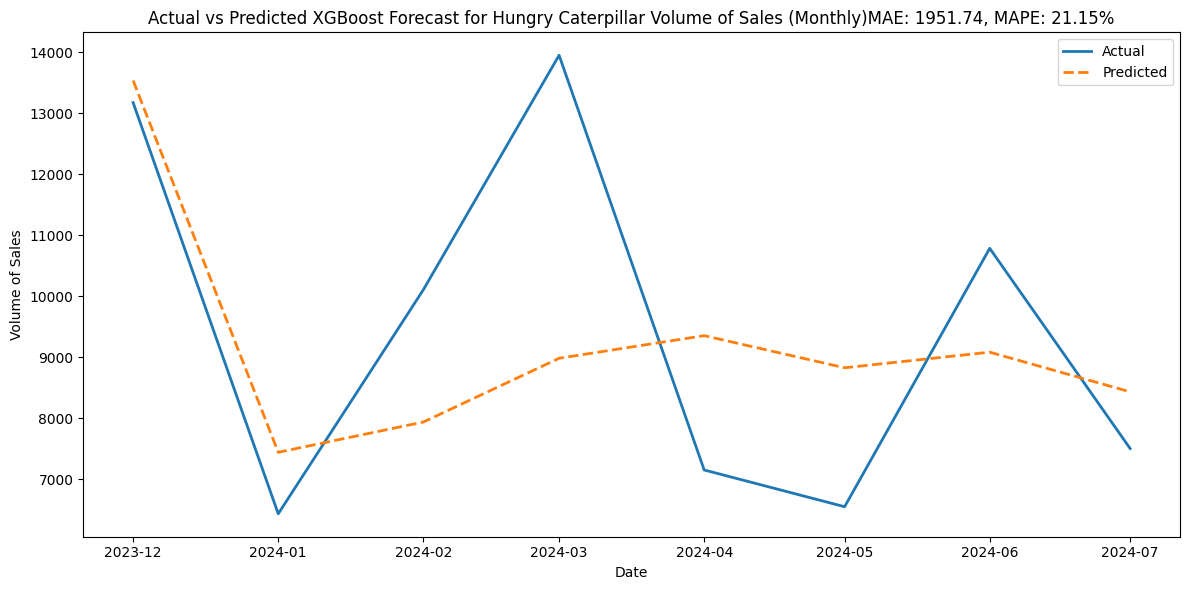

In [ ]:
# Compute MAE and MAPE
mae_hc_monthly = mean_absolute_error(y_test_hc_monthly, y_pred_hc_monthly)
mape_hc_monthly = mean_absolute_percentage_error(y_test_hc_monthly, y_pred_hc_monthly)

# Plot the original data along with the predictions for the Alchemist Monthly Dataset
x_axis_hc_monthly = y_test_hc_monthly.index.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(x_axis_hc_monthly, y_test_hc_monthly.values, label="Actual", linewidth=2)
plt.plot(x_axis_hc_monthly, y_pred_hc_monthly.values, label="Predicted", linestyle="--", linewidth=2)
plt.xlabel("Date")
plt.ylabel("Volume of Sales")
plt.title(
    "Actual vs Predicted XGBoost Forecast for Hungry Caterpillar Volume of Sales (Monthly)"
    f"MAE: {mae_hc_monthly:.2f}, MAPE: {mape_hc_monthly:.2%}"
)
plt.legend()
plt.tight_layout()

### Train SARIMA Model

#### The Alchemist Sarima Modelling & Forecasting on Monthly Dataset

In [ ]:
import multiprocessing

In [ ]:
forecast_period = 8
lookback_period = 12*5
n_jobs = max(1, multiprocessing.cpu_count() - 1)

Alchemist_train_monthly = ts_Alchemist_monthly.iloc[:-forecast_period]
Alchemist_test_monthly = ts_Alchemist_monthly.iloc[-forecast_period:]
Alchemist_train_subset_monthly = ts_Alchemist_monthly.iloc[-forecast_period-lookback_period:-forecast_period]

#Fit Auto Arima model to Alchemist training data with the below specified bound:
model_alchemist_monthly = auto_arima(y=Alchemist_train_subset_monthly, m=12, start_p=0, max_p=2,start_q=0, max_q=2,seasonal=True,d=0, max_d=1, start_P=0, max_P=2, start_Q=0, max_Q=1,D=None, max_D=1, max_order=8,information_criterion='aic', test='kpss', seasonal_test='ocsb', maxiter=20, step_wise=True, n_jobs=n_jobs, suppress_warnings=True, error_action='ignore' )

#Display
print(model_alchemist_monthly.summary())

#save
joblib.dump(model_alchemist_monthly, '/content/drive/MyDrive/model_alchemist_monthly.pkl')

                                 SARIMAX Results                                  
Dep. Variable:                          y   No. Observations:                   60
Model:             SARIMAX(0, 1, [1], 12)   Log Likelihood                -369.059
Date:                    Wed, 04 Jun 2025   AIC                            744.117
Time:                            04:01:01   BIC                            749.731
Sample:                        12-31-2018   HQIC                           746.239
                             - 11-30-2023                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    247.3550     53.725      4.604      0.000     142.055     352.654
ma.S.L12      -0.7032      0.389     -1.808      0.071      -1.465       0.059
sigma2      2.815e+0

['/content/drive/MyDrive/model_alchemist_monthly.pkl']

The best model identified for the Alchemist Dataset (resampled to monthyl), The SARIMAX(0, 1, [1], 12),  l shows a moderately significant seasonal component at lag 12 (p = 0.071), while not below the conventional 0.05 threshold, the value is suggestive of some seasonal structure, likely annual, The Ljung-Box test p-value = 0.85 indicates we fail to reject the null hypothesis of no autocorrelation in residuals, suggesting the model has adequately captured the serial correlation and residuals behave like white noise, a good sign of model fit. The AIC (744.117), BIC (749.731), and HQIC (746.239) are close in value, indicating no overfitting and that the model complexity is appropriate for the data.



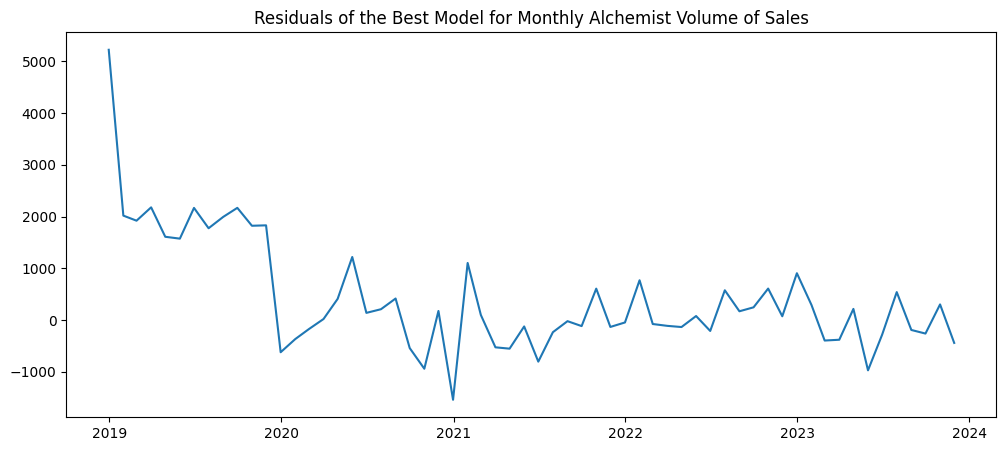

In [ ]:
# Residuals of the best model for the Alchemist
residuals_alchemist_monthly = model_alchemist_monthly.resid()

# Plot residuals
plt.figure(figsize=(12, 5))
plt.plot(residuals_alchemist_monthly)
plt.title('Residuals of the Best Model for Monthly Alchemist Volume of Sales')
plt.show()

The residuals fluctuate around zero and show no trend or pattern and behaves like whitenoise

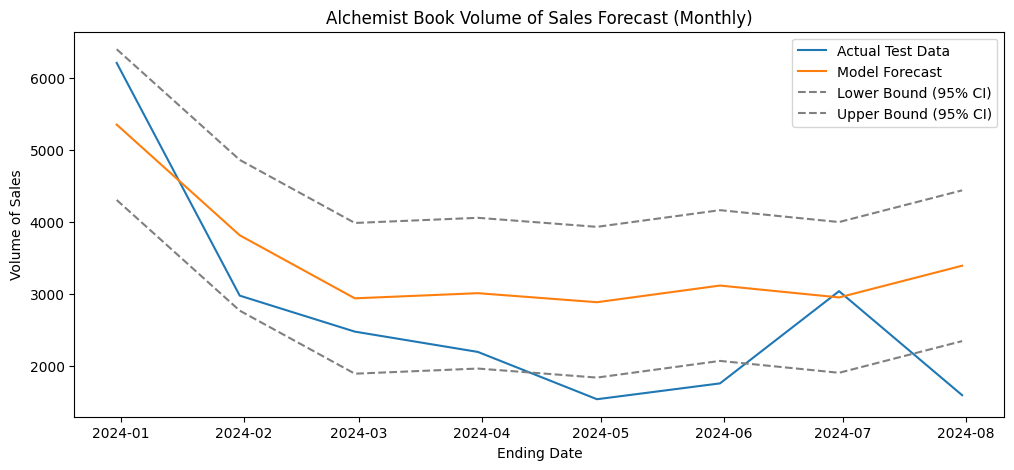

In [ ]:
forecast_alchemist_monthly, conf_int = model_alchemist_monthly.predict(n_periods=forecast_period, return_conf_int=True, alpha=0.05)

plt.figure(figsize=(12, 5))

# Plot actual test data
plt.plot(Alchemist_test_monthly.index,Alchemist_test_monthly, label='Actual Test Data')

# Model Forecast line
forecast_index = Alchemist_test_monthly.index
plt.plot(forecast_index, forecast_alchemist_monthly, label='Model Forecast')

# Plot confidence interval lines
plt.plot(forecast_index, conf_int[:, 0], linestyle='--', color='gray', label='Lower Bound (95% CI)')
plt.plot(forecast_index, conf_int[:, 1], linestyle='--', color='gray', label='Upper Bound (95% CI)')

plt.title('Alchemist Book Volume of Sales Forecast (Monthly)')
plt.xlabel('Ending Date')
plt.ylabel('Volume of Sales')
plt.legend()
plt.show()

For the monthly dataset, the SARIMA model showed that some actual values during the forecast period fell outside the 95% confidence interval. Although most actual values remained within the 95% confidence bounds, the model's performance was relatively poor compared to the weekly dataset. In contrast, for the weekly dataset, the SARIMA model accurately forecasted all Alchemist values, with all actual observations falling within the 95% confidence interval, indicating a better fit and more reliable forecasts.

#### The Very Hungry Caterpillar Sarima Modelling & Forecasting on Monthly Dataset

In [ ]:
# Focusing on subset of the data as the training data (last 5 years)
forecast_period = 8
lookback_period = 12*5

Hungry_Caterpillar_train_monthly = ts_Hungry_Caterpillar_monthly.iloc[:-forecast_period]
Hungry_Caterpillar_test_monthly =ts_Hungry_Caterpillar_monthly.iloc[-forecast_period:]
Hungry_Caterpillar_subset_monthly = ts_Hungry_Caterpillar_monthly.iloc[-forecast_period-lookback_period:-forecast_period]

#Fit Auto Arima model to Hungry Caterpillar Book training data with the below specified bound:
model_Hungry_Caterpillar_monthly = auto_arima(y=Hungry_Caterpillar_subset_monthly, m=12, start_p=1, max_p=2,start_q=1, max_q=2,seasonal=True,d=1, start_P=1, max_P=2, start_Q=1, max_Q=2, max_order=8,information_criterion='aic', test='kpss', seasonal_test='ocsb', maxiter=20, step_wise=True, n_jobs=n_jobs, suppress_warnings=True, error_action='ignore')

#Display
print(model_Hungry_Caterpillar_monthly.summary())

#save
joblib.dump(model_Hungry_Caterpillar_monthly, '/content/drive/MyDrive/model_Hungry_Caterpillar_monthly.pkl')

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   60
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 12)   Log Likelihood                -520.144
Date:                             Wed, 04 Jun 2025   AIC                           1046.289
Time:                                     04:04:56   BIC                           1052.521
Sample:                                 12-31-2018   HQIC                          1048.722
                                      - 11-30-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6776      0.088     -7.711      0.000      -0.850      -0.505
ar.S.L12       0.3792      

['/content/drive/MyDrive/model_Hungry_Caterpillar_monthly.pkl']

The best model identified for the The Very Hungry Caterpillar Dataset (resampled to monthy), The SARIMAX(0, 1, 1) × (1, 0, , 12) model  indicates a strongly significant seasonal autoregressive component at lag 12 (p < 0.001), confirming clear yearly seasonality in the data. Additionally, the MA(1) term is also highly significant (p < 0.001), suggesting the model effectively captures short-term noise and dependencies.The Ljung-Box test p-value = 0.72 shows that we fail to reject the null hypothesis of no autocorrelation in residuals, implying the model residuals behave like white noise and most temporal patterns have been captured.The AIC (1046.289), BIC (1052.521), and HQIC (1048.722) are reasonably close, indicating no overfitting and a balance between model complexity and goodness-of-fit.



In [ ]:
#load Hungry_caterpillar autoarima model
model_Hungry_Caterpillar_monthly = joblib.load('/content/drive/MyDrive/model_Hungry_Caterpillar_monthly.pkl')

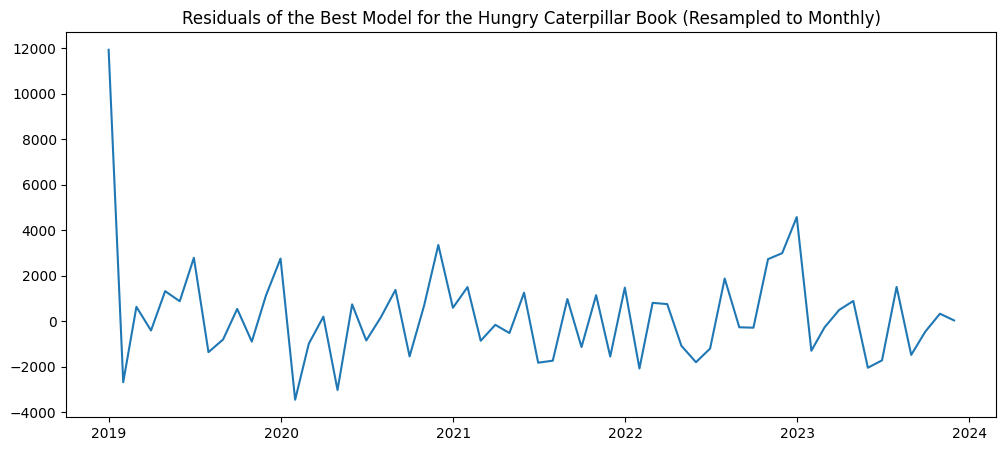

In [ ]:
# Residuals of the best model for the Hungry Caterpillar
residuals_Hungry_Caterpillar_monthly = model_Hungry_Caterpillar_monthly.resid()

# Plot residuals
plt.figure(figsize=(12, 5))
plt.plot(residuals_Hungry_Caterpillar_monthly)
plt.title('Residuals of the Best Model for the Hungry Caterpillar Book (Resampled to Monthly)')
plt.show()

Similar to the Alchemist Resiudals plot, the residuals fluctuate around zero confirming they don't have a trend, seasonality or patterns

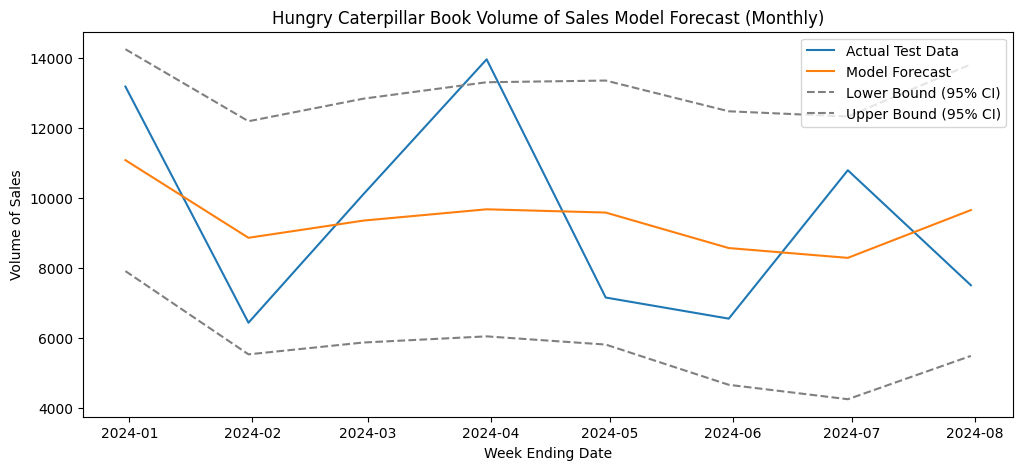

In [ ]:
forecast_Hungry_Caterpillar_monthly, conf_int = model_Hungry_Caterpillar_monthly.predict(n_periods=forecast_period, return_conf_int=True, alpha=0.05)

plt.figure(figsize=(12, 5))

# Plot actual test data
plt.plot(Hungry_Caterpillar_test_monthly.index, Hungry_Caterpillar_test_monthly, label='Actual Test Data')

# Model Forecast line
forecast_index = Hungry_Caterpillar_test_monthly.index
plt.plot(forecast_index, forecast_Hungry_Caterpillar_monthly, label='Model Forecast')

# Plot confidence interval lines
plt.plot(forecast_index, conf_int[:, 0], linestyle='--', color='gray', label='Lower Bound (95% CI)')
plt.plot(forecast_index, conf_int[:, 1], linestyle='--', color='gray', label='Upper Bound (95% CI)')

plt.title('Hungry Caterpillar Book Volume of Sales Model Forecast (Monthly)')
plt.xlabel('Week Ending Date')
plt.ylabel('Volume of Sales')
plt.legend()
plt.show()

Similar to the SARIMA model trained on the Alchemist dataset, the majority of actual values during the forecast period fall within the 95% confidence interval. However, there are specific areas—particularly at peaks—where actual values fall outside the interval. This suggests that while the model captures the overall average trend, it struggles to reflect sharp rises and falls in the volume of sales, limiting its ability to model short-term variability.

### Comparison on performance on Weekly compared to Monthly sampled Datasets:

#### SARIMAX

The Alchemists (Weekly v Monthly SARIMAX model performance)
- For the Weekly Dataset, The SARIMAX model identified a highly significant seasonal component at lag 52 (p < 0.001), confirming strong yearly seasonality in the weekly sales data.In comparison the SARIMAX best model for the monthly dataset, The seasonal component at lag 12 is only moderately significant (p = 0.071). While not statistically strong, it still suggests some degree of annual seasonality.
- The Sarimax model for the weekly Alchemist dataset demonstrates strong forecast performance, with all actual values falling within the 95% confidence interval, whereas for the Sarimax trained on monthly some of the forecasted values fall outside the 95% confidence interval, particularly at peaks, where the model struggles to capture sharp changes in sales volume.
- Overall, the monthly model performs less effectively than the weekly model, as it tends to smooth over fluctuations, failing to represent rises and falls in sales accurately.

The very Hungry Caterpillar Weekly v Monthly Sarimax model Performance
-For both the weekly and monthly trained sarimax models, there is a strong seasonal component thats significant
- The sarimax modeled on the  weekly dataset captures the rises and falls of the volume of sales better than the monthly dataset, this is because  weekly model provides finer granularity, enabling better responsiveness to short-term variations


#### XGBOOST
The Alchemist (Weekly v Monthly):
- The weekly model performs significantly better, with a lower MAE (182.28 vs 781.52) and MAPE (27.24% vs 36.37%) than the monthly model. It captures short-term fluctuations and sharp peaks more accurately, while the monthly model smooths over these variations, reducing forecast precision.

The Hungry Caterpillar (weekly v monthly)
- The weekly model also outperforms here, with a lower MAE (490.48 vs 1951.74) and slightly better MAPE (20.6% vs 21.15%). It captures trends and some seasonality but underestimates sharp shifts. The monthly model struggles more with variability and produces higher errors

Conclusion:

-	Weekly trained models whether XGBoost or Sarimax forecast better than models trained on monthly dataset, this is because Weekly models capture seasonal trends and sales volatility more effectively, while monthly models tend to oversmooth and struggle with short-term variations
